## NYC  Taxi trips comparison of the months of February between 2019 and 2020

### Walter Sostene Losa - Davide Maira | Gruppo K


https://www.kaggle.com/datasets/microize/newyork-yellow-taxi-trip-data-2020-2019

### Table of contents

1. [Introduction](#introduction)  
2. [Preprocessing](#preprocessing)  
3. [Analysis](#eda)  

### 1. Introduction <a id='introduction'> </a>

Importing reqiured libraries 

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 20)
%matplotlib inline

Reading data

In [140]:
df2019 = pd.read_csv('.yellow_tripdata_2019-02.csv')
df2020 = pd.read_csv('.yellow_tripdata_2020-02.csv')

In [141]:
df2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.10,1,N,48,234,1,9.00,0.50,0.50,2.00,0.00,0.30,12.30,0.00
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.80,1,N,230,93,2,32.00,0.50,0.50,0.00,0.00,0.30,33.30,0.00
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.00,1,N,145,145,2,2.50,0.50,0.50,0.00,0.00,0.30,3.80,0.00
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.80,1,N,95,95,2,5.50,0.50,0.50,0.00,0.00,0.30,6.80,0.00
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.80,1,N,140,263,2,5.00,0.50,0.50,0.00,0.00,0.30,6.30,0.00


In [142]:
df2020.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.00,2020-02-01 00:17:35,2020-02-01 00:30:32,1.00,2.60,1.00,N,145,7,1.00,11.00,0.50,0.50,2.45,0.00,0.30,14.75,0.00
1,1.00,2020-02-01 00:32:47,2020-02-01 01:05:36,1.00,4.80,1.00,N,45,61,1.00,21.50,3.00,0.50,6.30,0.00,0.30,31.60,2.50
2,1.00,2020-02-01 00:31:44,2020-02-01 00:43:28,1.00,3.20,1.00,N,186,140,1.00,11.00,3.00,0.50,1.00,0.00,0.30,15.80,2.50
3,2.00,2020-02-01 00:07:35,2020-02-01 00:31:39,1.00,4.38,1.00,N,144,140,1.00,18.00,0.50,0.50,3.00,0.00,0.30,24.80,2.50
4,2.00,2020-02-01 00:51:43,2020-02-01 01:01:29,1.00,2.28,1.00,N,238,152,2.00,9.50,0.50,0.50,0.00,0.00,0.30,10.80,0.00


In [143]:
df2019.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [144]:
df2020.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

#### Data Dictionary

* **VendorID** - A code indicating the TPEP provider that provided the record.
    * 1= Creative Mobile Technologies, LLC;
    * 2= VeriFone Inc.
* **tpep_pickup_datetime** - The date and time when the meter was engaged.
* **tpep_dropoff_datetim** - The date and time when the meter was disengaged.
* **Passenger_count** - The number of passengers in the vehicle. This is a driver-entered value.
* **Trip_distance** - The elapsed trip distance in miles reported by the taximeter.
* **PULocationID** - TLC Taxi Zone in which the taximeter was engaged.
* **DOLocationID** - TLC Taxi Zone in which the taximeter was disengaged.
* **RateCodeID** - The final rate code in effect at the end of the trip.
    * 1= Standard rate
    * 2=JFK
    * 3=Newark
    * 4=Nassau or Westchester
    * 5=Negotiated fare
    * 6=Group ride
* **Store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
  * Y= store and forward trip
  * N= not a store and forward trip
* **Payment_type** - A numeric code signifying how the passenger paid for the trip.
  * 1= Credit card
  * 2= Cash
  * 3= No charge
  * 4= Dispute
  * 5= Unknown
  * 6= Voided trip
* **Fare_amount** - The time-and-distance fare calculated by the meter.
* **Extra** - Miscellaneous extras and surcharges. Currently, this only includes the 1 USD and 0.50 USD rush hour and overnight charges.
* **MTA_tax** - 0.50 USD MTA tax that is automatically triggered based on the metered rate in use.
* **Improvement_surcharge** - 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
* **Tip_amount** - Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
* **Tolls_amount** - Total amount of all tolls paid in trip.
* **Total_amount** - The total amount charged to passengers. Does not include cash tips.
* **Congestion_surcharge** - Surcharge for congestion. There is no information about it in the dictionary.


Print the calendar of Frebruary 2019 and 2020

In [145]:
yy2019 = 2019  # year 2019
yy2020 = 2020  # year 2020
mm = 2  # month April
print(calendar.month(yy2019, mm))


   February 2019
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28



In [146]:
print(calendar.month(yy2020, mm))

   February 2020
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29



### 2. Preprocessing <a id='preprocessing'> </a>

In [147]:
df2019.memory_usage(deep=True)
df2020.memory_usage(deep=True)

old_n_2019 = df2019.shape[0]
old_n_2020 = df2020.shape[0]

We have identified missing values in several columns, including VendorID, passenger_count, RatecodeID, store_and_fwd_flag, and payment_type. Recognizing the importance of the passenger_count column for our analysis, we have decided to address the missing values in a cohesive manner. Since the missing values are consistent across these columns, we infer that they belong to the same set of rows. To maintain data integrity, we have opted to drop rows with missing values in the passenger_count column. Consequently, this action will result in the removal of corresponding entries in the other specified columns. In this way, we aim to ensure the coherence of our dataset

In [148]:
df2019 = df2019.dropna()
df2020 = df2020.dropna()
df2019.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,"7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00","7,019,375.00"
mean,1.64,1.57,2.88,1.06,163.51,161.80,1.27,12.75,1.16,0.50,2.16,0.34,0.30,18.56,2.17
std,0.52,1.23,3.78,0.64,65.94,70.08,0.47,255.91,1.27,0.05,2.63,1.67,0.02,256.04,0.85
min,1.00,0.00,0.00,1.00,1.00,1.00,1.00,-400.00,-4.50,-0.50,-62.00,-26.26,-0.30,-400.80,-2.50
25%,1.00,1.00,0.94,1.00,114.00,112.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.00,2.50
50%,2.00,1.00,1.60,1.00,162.00,162.00,1.00,9.00,0.50,0.50,1.86,0.00,0.30,14.16,2.50
75%,2.00,2.00,2.91,1.00,233.00,234.00,2.00,14.00,2.50,0.50,2.86,0.00,0.30,19.80,2.50
max,4.00,9.00,701.50,99.00,265.00,265.00,4.00,"671,123.14",18.50,24.39,499.69,771.52,1.00,"671,124.94",2.75


In [149]:
df2020.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,"6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00","6,250,520.00"
mean,1.67,1.50,2.79,1.06,164.82,162.79,1.26,12.46,1.10,0.49,2.24,0.32,0.30,18.45,2.31
std,0.47,1.14,3.64,0.78,65.42,69.68,0.47,11.76,1.25,0.07,2.67,1.66,0.03,14.36,0.69
min,1.00,0.00,0.00,1.00,1.00,1.00,1.00,-750.00,-17.69,-0.50,-93.00,-38.23,-0.30,-750.30,-2.50
25%,1.00,1.00,0.95,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.27,2.50
50%,2.00,1.00,1.60,1.00,162.00,162.00,1.00,9.00,0.50,0.50,1.96,0.00,0.30,14.30,2.50
75%,2.00,2.00,2.86,1.00,234.00,234.00,1.00,14.00,2.50,0.50,2.95,0.00,0.30,19.80,2.50
max,2.00,9.00,369.94,99.00,265.00,265.00,4.00,"6,052.00",90.06,39.51,549.02,925.50,0.30,"6,061.42",2.75


In [150]:
df2019.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7019375 entries, 0 to 7019374
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(9), int64(6), object(3)
memory usage: 964.0+ MB


In [151]:
df2020.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6250520 entries, 0 to 6250519
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 906.1+ MB


Seems like there is no missed data sp far. Need to correct negative values and correct data types  
Let's first correct negative values. We will change them to positive. But first we will check whether this decision correct 

In [152]:
df2019[(df2019['fare_amount'] < 0)].sort_values('total_amount')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2616622,2,2019-02-11 05:02:55,2019-02-11 05:09:52,4,0.00,5,N,149,149,4,-400.00,0.00,-0.50,0.00,0.00,-0.30,-400.80,0.00
4107657,2,2019-02-16 23:35:57,2019-02-16 23:36:01,1,0.00,5,N,265,265,4,-270.00,0.00,0.00,0.00,0.00,-0.30,-270.30,0.00
2395938,2,2019-02-10 00:57:05,2019-02-10 00:59:19,1,0.00,5,N,238,238,3,-250.00,0.00,-0.50,0.00,0.00,-0.30,-253.30,-2.50
3331049,2,2019-02-13 22:27:40,2019-02-13 22:36:17,1,0.99,5,N,265,265,4,-235.00,0.00,-0.50,0.00,0.00,-0.30,-235.80,0.00
524178,2,2019-02-02 20:34:22,2019-02-02 20:34:36,2,0.00,5,N,265,265,3,-215.32,0.00,-0.50,0.00,0.00,-0.30,-216.12,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897745,2,2019-02-12 09:24:03,2019-02-12 09:24:07,1,0.00,5,N,61,61,3,-0.01,0.00,0.00,0.00,0.00,-0.30,-0.31,0.00
2614756,2,2019-02-11 03:59:25,2019-02-11 04:00:09,1,0.29,5,N,149,149,3,-0.01,0.00,0.00,0.00,0.00,-0.30,-0.31,0.00
16592,2,2019-02-01 04:31:13,2019-02-01 04:31:16,1,0.00,5,N,264,91,3,-0.01,0.00,0.00,0.00,0.00,-0.30,-0.31,0.00
1413150,2,2019-02-06 15:23:48,2019-02-06 15:23:51,1,0.02,5,N,264,123,3,-0.01,0.00,0.00,0.00,0.00,-0.30,-0.31,0.00


In [153]:
df2020[(df2020['fare_amount'] < 0)].sort_values('total_amount')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1441546,2.00,2020-02-07 17:04:31,2020-02-07 17:05:03,1.00,0.00,5.00,N,226,226,3.00,-750.00,0.00,0.00,0.00,0.00,-0.30,-750.30,0.00
5770691,2.00,2020-02-27 23:01:46,2020-02-27 23:06:47,1.00,2.47,5.00,N,88,195,2.00,-450.00,0.00,0.00,0.00,-25.00,-0.30,-477.80,-2.50
1890202,2.00,2020-02-09 18:08:50,2020-02-10 08:51:38,1.00,2.17,1.00,N,162,25,3.00,-445.00,0.00,-0.50,0.00,0.00,-0.30,-448.30,-2.50
6228391,2.00,2020-02-29 22:46:27,2020-02-29 22:46:32,1.00,0.00,5.00,N,264,264,4.00,-400.00,0.00,0.00,0.00,0.00,-0.30,-400.30,0.00
3718247,2.00,2020-02-18 15:56:00,2020-02-18 15:56:02,1.00,0.00,5.00,N,265,264,3.00,-315.00,0.00,0.00,0.00,0.00,-0.30,-315.30,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904048,2.00,2020-02-14 11:46:38,2020-02-14 11:46:48,1.00,0.00,5.00,N,193,193,3.00,-0.01,0.00,0.00,0.00,0.00,-0.30,-0.31,0.00
5390593,2.00,2020-02-26 14:56:34,2020-02-26 14:56:48,1.00,0.00,5.00,N,132,132,3.00,-0.01,0.00,0.00,0.00,0.00,-0.30,-0.31,0.00
5486700,2.00,2020-02-26 21:33:20,2020-02-26 21:33:29,1.00,0.00,5.00,N,193,193,3.00,-0.01,0.00,0.00,0.00,0.00,-0.30,-0.31,0.00
535289,2.00,2020-02-03 18:26:16,2020-02-03 18:26:31,1.00,0.00,5.00,N,264,264,3.00,-0.01,0.00,0.00,0.00,0.00,-0.30,-0.31,0.00


In [154]:
for col in list(df2019.select_dtypes(include='number').columns):
    df2019[col] = df2019[col].apply(lambda x: abs(x) if x < 0 else x)

for col in list(df2020.select_dtypes(include='number').columns):
    df2020[col] = df2020[col].apply(lambda x: abs(x) if x < 0 else x)

Now we will correct data types  

In [155]:
df2019['tpep_pickup_datetime'] = pd.to_datetime(df2019['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df2019['tpep_dropoff_datetime'] = pd.to_datetime(df2019['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df2019.tpep_pickup_datetime.describe()


count                          7019375
mean     2019-02-14 21:55:19.563049216
min                2008-12-31 06:57:04
25%                2019-02-07 19:39:18
50%                2019-02-14 17:06:57
75%                2019-02-22 04:34:06
max                2038-02-17 21:55:54
Name: tpep_pickup_datetime, dtype: object

In [156]:
df2020['tpep_pickup_datetime'] = pd.to_datetime(df2020['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
df2020['tpep_dropoff_datetime'] = pd.to_datetime(df2020['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
df2020.tpep_pickup_datetime.describe()

count                          6250520
mean     2020-02-15 17:07:39.735889920
min                2008-12-31 22:20:23
25%      2020-02-08 04:35:59.750000128
50%         2020-02-15 07:22:50.500000
75%      2020-02-22 23:45:11.249999872
max                2020-07-11 12:57:52
Name: tpep_pickup_datetime, dtype: object

There are dates beyond February. We will drop them  

In [157]:
df2019 = df2019[(df2019['tpep_pickup_datetime'] > '2019-02-01 00:00:00') & (df2019['tpep_pickup_datetime'] < '2019-02-28 23:59:59')]
df2019.tpep_pickup_datetime.describe()

count                          7018744
mean     2019-02-14 22:50:39.997760256
min                2019-02-01 00:00:02
25%                2019-02-07 19:40:04
50%                2019-02-14 17:07:14
75%      2019-02-22 04:31:32.249999872
max                2019-02-28 23:59:58
Name: tpep_pickup_datetime, dtype: object

In [158]:
df2020 = df2020[(df2020['tpep_pickup_datetime'] > '2020-02-01 00:00:00') & (df2020['tpep_pickup_datetime'] < '2020-02-28 23:59:59')]
df2020.tpep_pickup_datetime.describe()

count                          6021084
mean     2020-02-15 04:57:30.255121664
min                2020-02-01 00:00:01
25%                2020-02-07 22:05:48
50%                2020-02-14 18:34:04
75%      2020-02-22 07:34:37.249999872
max                2020-02-28 23:59:57
Name: tpep_pickup_datetime, dtype: object

And make this columns as category type  

In [159]:
df2019['VendorID'] = df2019['VendorID'].astype('category')
df2019['RatecodeID'] = df2019['RatecodeID'].astype('category')
df2019['store_and_fwd_flag'] = df2019['store_and_fwd_flag'].astype('category')
df2019['PULocationID'] = df2019['PULocationID'].astype('category')
df2019['DOLocationID'] = df2019['DOLocationID'].astype('category')
df2019['payment_type'] = df2019['payment_type'].astype('category')

df2019.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 7018744 entries, 0 to 7019374
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             category      
 6   store_and_fwd_flag     category      
 7   PULocationID           category      
 8   DOLocationID           category      
 9   payment_type           category      
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: category(6), datetime64[

In [160]:
df2020['VendorID'] = df2020['VendorID'].astype('category')
df2020['RatecodeID'] = df2020['RatecodeID'].astype('category')
df2020['store_and_fwd_flag'] = df2020['store_and_fwd_flag'].astype('category')
df2020['PULocationID'] = df2020['PULocationID'].astype('category')
df2020['DOLocationID'] = df2020['DOLocationID'].astype('category')
df2020['payment_type'] = df2020['payment_type'].astype('category')

df2020.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 6021084 entries, 0 to 6118499
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               category      
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             category      
 6   store_and_fwd_flag     category      
 7   PULocationID           category      
 8   DOLocationID           category      
 9   payment_type           category      
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: category(6), datetime64[

In [161]:
df2019.memory_usage(deep=True)

Index                    56149952
VendorID                  7018876
tpep_pickup_datetime     56149952
tpep_dropoff_datetime    56149952
passenger_count          56149952
trip_distance            56149952
RatecodeID                7019100
store_and_fwd_flag        7018968
PULocationID             14047872
DOLocationID             14047880
payment_type              7018948
fare_amount              56149952
extra                    56149952
mta_tax                  56149952
tip_amount               56149952
tolls_amount             56149952
improvement_surcharge    56149952
total_amount             56149952
congestion_surcharge     56149952
dtype: int64

In [162]:
df2020.memory_usage(deep=True)

Index                    48168672
VendorID                  6021208
tpep_pickup_datetime     48168672
tpep_dropoff_datetime    48168672
passenger_count          48168672
trip_distance            48168672
RatecodeID                6021440
store_and_fwd_flag        6021308
PULocationID             12052536
DOLocationID             12052552
payment_type              6021288
fare_amount              48168672
extra                    48168672
mta_tax                  48168672
tip_amount               48168672
tolls_amount             48168672
improvement_surcharge    48168672
total_amount             48168672
congestion_surcharge     48168672
dtype: int64

Also we want to add some additional columns  

In [163]:
df2019.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,7018744,7018744,"7,018,744.00","7,018,744.00","7,018,744.00","7,018,744.00","7,018,744.00","7,018,744.00","7,018,744.00","7,018,744.00","7,018,744.00","7,018,744.00"
mean,2019-02-14 22:50:39.997760256,2019-02-14 23:07:47.695699712,1.57,2.88,12.77,1.16,0.50,2.16,0.34,0.30,18.59,2.18
min,2019-02-01 00:00:02,2018-02-13 17:34:31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2019-02-07 19:40:04,2019-02-07 19:55:59,1.00,0.94,6.50,0.00,0.50,0.00,0.00,0.30,11.00,2.50
50%,2019-02-14 17:07:14,2019-02-14 17:27:14,1.00,1.60,9.00,0.50,0.50,1.86,0.00,0.30,14.16,2.50
75%,2019-02-22 04:31:32.249999872,2019-02-22 05:06:07,2.00,2.91,14.00,2.50,0.50,2.86,0.00,0.30,19.80,2.50
max,2019-02-28 23:59:58,2019-03-01 23:46:44,9.00,701.50,"671,123.14",18.50,24.39,499.69,771.52,1.00,"671,124.94",2.75
std,NaN,NaN,1.23,3.78,255.93,1.27,0.04,2.63,1.67,0.01,256.05,0.84


In [164]:
df2020.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6021084,6021084,"6,021,084.00","6,021,084.00","6,021,084.00","6,021,084.00","6,021,084.00","6,021,084.00","6,021,084.00","6,021,084.00","6,021,084.00","6,021,084.00"
mean,2020-02-15 04:57:30.255121664,2020-02-15 05:13:33.562484224,1.50,2.80,12.56,1.10,0.50,2.25,0.32,0.30,18.59,2.32
min,2020-02-01 00:00:01,2020-02-01 00:00:36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2020-02-07 22:05:48,2020-02-07 22:21:18,1.00,0.95,6.50,0.00,0.50,0.00,0.00,0.30,11.30,2.50
50%,2020-02-14 18:34:04,2020-02-14 18:50:05,1.00,1.60,9.00,0.50,0.50,1.96,0.00,0.30,14.30,2.50
75%,2020-02-22 07:34:37.249999872,2020-02-22 07:50:59.500000,2.00,2.86,14.00,2.50,0.50,2.95,0.00,0.30,19.80,2.50
max,2020-02-28 23:59:57,2020-02-29 23:49:12,9.00,369.94,"6,052.00",90.06,39.51,549.02,925.50,0.30,"6,061.42",2.75
std,NaN,NaN,1.14,3.65,11.72,1.25,0.04,2.68,1.67,0.01,14.29,0.65


In [165]:
df2019['date'] = df2019['tpep_pickup_datetime'].dt.date
df2019['day'] = df2019['tpep_pickup_datetime'].dt.day
df2019['weekday'] = df2019['tpep_pickup_datetime'].dt.weekday
df2019['hr'] = df2019['tpep_pickup_datetime'].dt.hour

df2019['duration'] = df2019['tpep_dropoff_datetime'] - df2019['tpep_pickup_datetime']
df2019['duration'] = df2019['duration'] / np.timedelta64(1, 'm')

df2019.duration.describe()

count   7,018,744.00
mean           17.13
std           210.77
min      -525,460.48
25%             6.45
50%            10.78
75%            17.60
max        25,987.98
Name: duration, dtype: float64

In [166]:
df2020['date'] = df2020['tpep_pickup_datetime'].dt.date
df2020['day'] = df2020['tpep_pickup_datetime'].dt.day
df2020['weekday'] = df2020['tpep_pickup_datetime'].dt.weekday
df2020['hr'] = df2020['tpep_pickup_datetime'].dt.hour

df2020['duration'] = df2020['tpep_dropoff_datetime'] - df2020['tpep_pickup_datetime']
df2020['duration'] = df2020['duration'] / np.timedelta64(1, 'm')

df2020.duration.describe()

count   6,021,084.00
mean           16.06
std            61.53
min        -9,990.67
25%             6.53
50%            10.77
75%            17.22
max         3,147.62
Name: duration, dtype: float64

There are negative and zero values. It means pickup date is later than dropoff or at the same time.

In [167]:
df2019[df2019['duration'] <= 0].sort_values('duration')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hr,duration
3214008,1,2019-02-13 15:15:00,2018-02-13 17:34:31,1,21.30,2,N,132,88,2,52.00,2.50,0.50,0.00,5.76,0.30,61.06,2.50,2019-02-13,13,2,15,"-525,460.48"
5641396,1,2019-02-23 15:15:25,2019-02-22 16:06:56,1,20.20,2,N,132,125,1,52.00,2.50,0.50,11.05,0.00,0.30,66.35,2.50,2019-02-23,23,5,15,"-1,388.48"
3809083,1,2019-02-15 19:43:41,2019-02-15 19:30:58,0,0.00,99,Y,264,264,1,7.82,0.00,0.00,0.00,0.00,0.00,7.82,0.00,2019-02-15,15,4,19,-12.72
4823506,1,2019-02-20 11:33:59,2019-02-20 11:33:20,0,13.60,99,Y,264,264,1,38.00,2.50,0.50,9.40,5.76,0.30,56.46,0.00,2019-02-20,20,2,11,-0.65
4528148,1,2019-02-19 05:25:13,2019-02-19 05:25:13,1,0.00,1,N,186,264,2,2.50,3.00,0.50,0.00,0.00,0.30,6.30,2.50,2019-02-19,19,1,5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205898,1,2019-02-09 12:13:26,2019-02-09 12:13:26,1,0.00,1,N,164,264,2,2.50,2.50,0.50,0.00,0.00,0.30,5.80,2.50,2019-02-09,9,5,12,0.00
2205453,1,2019-02-09 12:16:02,2019-02-09 12:16:02,2,0.00,1,N,140,264,2,8.00,2.50,0.50,0.00,0.00,0.30,11.30,2.50,2019-02-09,9,5,12,0.00
2205442,1,2019-02-09 12:40:55,2019-02-09 12:40:55,1,0.00,1,N,170,264,2,14.50,2.50,0.50,0.00,0.00,0.30,17.80,2.50,2019-02-09,9,5,12,0.00
2171524,2,2019-02-09 09:23:01,2019-02-09 09:23:01,3,0.00,1,N,264,264,2,2.50,0.00,0.50,0.00,0.00,0.30,3.30,0.00,2019-02-09,9,5,9,0.00


In [168]:
df2020[df2020['duration'] <= 0].sort_values('duration')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hr,duration
2092815,1.00,2020-02-10 19:50:35,2020-02-03 21:19:55,1.00,22.00,2.00,N,132,161,1.00,52.00,2.50,0.50,12.25,6.12,0.30,73.67,2.50,2020-02-10,10,0,19,"-9,990.67"
938272,1.00,2020-02-05 16:28:03,2020-02-03 16:47:05,1.00,1.20,1.00,N,236,262,1.00,8.00,3.50,0.50,3.65,0.00,0.30,15.95,2.50,2020-02-05,5,2,16,"-2,860.97"
1765,1.00,2020-02-01 00:51:50,2020-02-01 00:51:50,1.00,0.00,1.00,N,249,264,2.00,2.50,3.00,0.50,0.00,0.00,0.30,6.30,2.50,2020-02-01,1,5,0,0.00
4020066,1.00,2020-02-20 05:26:57,2020-02-20 05:26:57,1.00,0.00,2.00,N,264,264,2.00,52.00,0.00,0.50,0.00,6.12,0.30,58.92,0.00,2020-02-20,20,3,5,0.00
4020273,1.00,2020-02-20 05:34:02,2020-02-20 05:34:02,1.00,0.00,1.00,N,75,264,2.00,4.50,0.50,0.50,0.00,0.00,0.30,5.80,0.00,2020-02-20,20,3,5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036463,1.00,2020-02-10 15:08:40,2020-02-10 15:08:40,1.00,0.00,1.00,Y,238,264,2.00,5.50,2.50,0.50,0.00,0.00,0.30,8.80,2.50,2020-02-10,10,0,15,0.00
2038468,1.00,2020-02-10 15:26:36,2020-02-10 15:26:36,1.00,0.00,1.00,N,113,264,2.00,2.50,2.50,0.50,0.00,0.00,0.30,5.80,2.50,2020-02-10,10,0,15,0.00
2039678,1.00,2020-02-10 15:35:19,2020-02-10 15:35:19,1.00,0.00,1.00,Y,170,264,2.00,4.50,2.50,0.50,0.00,0.00,0.30,7.80,2.50,2020-02-10,10,0,15,0.00
2040013,1.00,2020-02-10 15:12:58,2020-02-10 15:12:58,1.00,0.00,1.00,N,246,264,2.00,7.00,2.50,0.50,0.00,0.00,0.30,10.30,2.50,2020-02-10,10,0,15,0.00


There is something wrong with taximeter. Pickup and dropoff couldn't be equal to each other or pickup couldn't be later then dropoff. We will drop them and will have clear data

In [169]:
df2019 = df2019[df2019['duration'] > 0]
df2020 = df2020[df2020['duration'] > 0]

In [170]:
df2019[df2019['duration'] > 180].sort_values('duration', ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hr,duration
1581741,1,2019-02-07 07:28:18,2019-02-25 08:36:17,1,3.40,1,N,186,261,2,15.00,2.50,0.50,0.00,0.00,0.30,18.30,2.50,2019-02-07,7,3,7,"25,987.98"
5595886,2,2019-02-23 12:54:23,2019-02-26 16:34:35,1,0.00,99,N,193,193,2,20.50,0.80,0.50,0.00,0.00,0.00,21.80,0.00,2019-02-23,23,5,12,"4,540.20"
599562,1,2019-02-03 03:37:50,2019-02-05 11:25:38,1,1.20,1,N,88,13,1,7.50,2.50,0.50,2.15,0.00,0.30,12.95,2.50,2019-02-03,3,6,3,"3,347.80"
6108943,2,2019-02-25 16:00:15,2019-02-26 16:00:13,1,0.51,1,N,113,113,2,4.50,1.00,0.50,0.00,0.00,0.30,8.80,2.50,2019-02-25,25,0,16,"1,439.97"
2257450,2,2019-02-09 15:32:26,2019-02-10 15:32:24,1,1.44,1,N,234,144,2,12.50,0.00,0.50,0.00,0.00,0.30,15.80,2.50,2019-02-09,9,5,15,"1,439.97"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754916,2,2019-02-03 20:57:31,2019-02-04 00:00:00,1,16.45,2,N,132,162,2,52.00,0.00,0.50,0.00,0.00,0.30,55.30,2.50,2019-02-03,3,6,20,182.48
4490654,2,2019-02-18 20:58:04,2019-02-19 00:00:00,5,0.40,1,N,100,48,1,4.00,0.50,0.50,1.95,0.00,0.30,9.75,2.50,2019-02-18,18,0,20,181.93
6733801,2,2019-02-27 20:12:08,2019-02-27 23:13:26,1,0.66,1,N,164,161,1,4.50,3.00,0.50,1.66,0.00,0.30,9.96,0.00,2019-02-27,27,2,20,181.30
4894772,2,2019-02-20 15:58:18,2019-02-20 18:58:55,5,20.71,1,N,114,45,2,121.50,1.00,0.50,0.00,5.76,0.30,131.56,2.50,2019-02-20,20,2,15,180.62


In [171]:
df2020[df2020['duration'] > 180].sort_values('duration', ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hr,duration
4514524,2.00,2020-02-22 07:51:23,2020-02-24 12:19:00,1.00,0.00,99.00,N,193,207,2.00,2.50,0.80,0.50,0.00,0.00,0.00,3.80,0.00,2020-02-22,22,5,7,"3,147.62"
3421937,2.00,2020-02-16 18:01:42,2020-02-18 13:54:21,1.00,6.09,1.00,N,132,168,2.00,18.50,0.80,0.50,0.00,0.00,0.00,19.80,0.00,2020-02-16,16,6,18,"2,632.65"
221713,2.00,2020-02-02 01:45:44,2020-02-03 10:15:59,1.00,6.47,1.00,N,132,132,2.00,19.00,1.30,0.50,0.00,0.00,0.00,20.80,0.00,2020-02-02,2,6,1,"1,950.25"
5691161,2.00,2020-02-27 18:01:02,2020-02-28 18:57:20,1.00,0.39,1.00,N,164,10,2.00,3.50,1.80,0.50,0.00,23.25,0.00,31.55,2.50,2020-02-27,27,3,18,"1,496.30"
321414,2.00,2020-02-02 15:28:08,2020-02-03 15:50:02,2.00,1.66,1.00,N,48,143,2.00,9.50,0.80,0.50,0.00,0.00,0.00,13.30,2.50,2020-02-02,2,6,15,"1,461.90"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490742,2.00,2020-02-07 18:05:34,2020-02-07 21:06:41,2.00,18.24,5.00,N,132,231,2.00,65.00,0.00,0.00,0.00,0.00,0.00,67.50,2.50,2020-02-07,7,4,18,181.12
5979484,2.00,2020-02-28 20:59:01,2020-02-29 00:00:00,1.00,6.86,2.00,N,82,229,1.00,52.00,0.00,0.50,12.28,6.12,0.30,73.70,2.50,2020-02-28,28,4,20,180.98
382002,2.00,2020-02-02 20:59:11,2020-02-03 00:00:00,1.00,19.18,2.00,N,132,79,1.00,52.00,0.00,0.50,5.53,0.00,0.30,60.83,2.50,2020-02-02,2,6,20,180.82
406018,2.00,2020-02-03 21:31:19,2020-02-04 00:32:02,1.00,0.00,5.00,N,132,14,1.00,32.00,0.00,0.00,6.40,0.00,0.00,38.40,0.00,2020-02-03,3,0,21,180.72


In [172]:
df2019 = df2019[df2019['duration'] < 200]
df2020 = df2020[df2020['duration'] < 200]

Now it's time to check passengers  

In [173]:
df2019.passenger_count.value_counts()

passenger_count
1    4936403
2    1040994
5     302516
3     286140
6     180782
4     128291
0     118861
7         29
8         28
9         14
Name: count, dtype: int64

In [174]:
df2020.passenger_count.value_counts()

passenger_count
1.00    4329873
2.00     883932
3.00     229769
5.00     209797
6.00     123493
0.00     118773
4.00     109523
7.00         24
8.00         16
9.00          7
Name: count, dtype: int64

Another interisting thing is that maximum allowed passengers is five persons. But here we have more in many rides. In a TLC rules it is written that extra passengers could be accepted if such passenger is under the age of seven. So we think it is ok to leave this data  

Now we're going to check trip distance column  
  

In [175]:
df2019.trip_distance.describe()

count   6,994,058.00
mean            2.88
std             3.77
min             0.00
25%             0.94
50%             1.60
75%             2.91
max           701.50
Name: trip_distance, dtype: float64

In [176]:
df2020.trip_distance.describe()

count   6,005,207.00
mean            2.79
std             3.64
min             0.00
25%             0.95
50%             1.60
75%             2.86
max           166.07
Name: trip_distance, dtype: float64

There are rides with 0 distance. We will to consider them carefully  

In [177]:
df2019[df2019['trip_distance'] == 0].sort_values('duration', ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hr,duration
731135,2,2019-02-03 15:25:08,2019-02-03 18:38:58,1,0.00,5,N,132,143,1,61.00,0.00,0.50,12.30,0.00,0.00,73.80,0.00,2019-02-03,3,6,15,193.83
5112819,2,2019-02-21 11:38:01,2019-02-21 14:48:33,1,0.00,5,N,265,132,1,65.00,0.00,0.50,13.10,0.00,0.00,78.60,0.00,2019-02-21,21,3,11,190.53
1977104,2,2019-02-08 13:15:45,2019-02-08 16:25:08,2,0.00,5,N,25,237,1,63.00,0.00,0.00,12.60,0.00,0.00,75.60,0.00,2019-02-08,8,4,13,189.38
3566319,2,2019-02-14 17:26:36,2019-02-14 20:35:07,2,0.00,5,N,132,88,1,66.00,0.00,0.00,13.20,0.00,0.00,79.20,0.00,2019-02-14,14,3,17,188.52
5188677,2,2019-02-21 16:11:57,2019-02-21 19:19:33,1,0.00,5,N,229,170,1,65.00,0.00,0.00,13.50,0.00,0.00,81.00,2.50,2019-02-21,21,3,16,187.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487920,4,2019-02-06 20:46:54,2019-02-06 20:46:55,1,0.00,5,N,238,238,2,24.50,0.00,0.50,0.00,0.00,0.30,25.30,0.00,2019-02-06,6,2,20,0.02
1791121,2,2019-02-07 21:05:38,2019-02-07 21:05:39,2,0.00,1,N,264,229,1,2.50,0.50,0.50,1.14,0.00,0.30,4.94,0.00,2019-02-07,7,3,21,0.02
790479,2,2019-02-04 01:10:21,2019-02-04 01:10:22,1,0.00,5,N,264,140,1,12.00,0.00,0.50,3.20,0.00,0.30,16.00,0.00,2019-02-04,4,0,1,0.02
790493,2,2019-02-04 01:11:24,2019-02-04 01:11:25,2,0.00,1,N,24,24,2,2.50,0.50,0.50,0.00,0.00,0.30,3.80,0.00,2019-02-04,4,0,1,0.02


In [178]:
df2020[df2020['trip_distance'] == 0].sort_values('duration', ascending=False)  

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hr,duration
4152032,2.00,2020-02-20 13:58:58,2020-02-20 17:17:20,1.00,0.00,5.00,N,10,90,1.00,52.00,0.00,0.50,11.00,0.00,0.00,66.00,2.50,2020-02-20,20,3,13,198.37
2826418,2.00,2020-02-13 22:50:16,2020-02-14 02:08:32,1.00,0.00,2.00,N,68,68,2.00,52.00,0.80,0.50,0.00,0.00,0.30,56.10,2.50,2020-02-13,13,3,22,198.27
3588499,2.00,2020-02-17 17:17:59,2020-02-17 20:34:22,1.00,0.00,5.00,N,142,143,1.00,65.00,0.00,0.00,13.50,0.00,0.00,81.00,2.50,2020-02-17,17,0,17,196.38
5875660,2.00,2020-02-28 10:37:43,2020-02-28 13:52:01,1.00,0.00,5.00,N,132,89,1.00,96.00,0.00,0.00,10.08,0.00,0.00,106.08,0.00,2020-02-28,28,4,10,194.30
2581414,2.00,2020-02-12 19:01:27,2020-02-12 22:14:57,1.00,0.00,5.00,N,100,114,1.00,65.00,0.00,0.50,5.00,0.00,0.00,73.00,2.50,2020-02-12,12,2,19,193.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402418,2.00,2020-02-02 23:11:21,2020-02-02 23:11:22,1.00,0.00,5.00,N,229,264,1.00,7.00,0.00,0.50,1.56,0.00,0.30,9.36,0.00,2020-02-02,2,6,23,0.02
2593984,2.00,2020-02-13 00:02:59,2020-02-13 00:03:00,1.00,0.00,5.00,N,264,264,1.00,35.00,0.00,0.00,7.06,0.00,0.30,42.36,0.00,2020-02-13,13,3,0,0.02
4513310,2.00,2020-02-22 06:44:58,2020-02-22 06:44:59,1.00,0.00,5.00,N,264,264,1.00,65.00,0.00,0.50,13.16,0.00,0.30,78.96,0.00,2020-02-22,22,5,6,0.02
398618,2.00,2020-02-02 22:59:03,2020-02-02 22:59:04,1.00,0.00,5.00,N,162,264,1.00,13.00,0.00,0.00,1.00,0.00,0.30,14.30,0.00,2020-02-02,2,6,22,0.02


And there are 1 minute rides. First going to check them  

In [179]:
df2019[(df2019['trip_distance'] == 0) & (df2019['duration'] == 1)].sort_values('total_amount', ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hr,duration
6523379,2,2019-02-27 09:18:07,2019-02-27 09:19:07,1,0.00,5,N,265,265,1,350.00,0.00,0.50,0.00,0.00,0.30,350.80,0.00,2019-02-27,27,2,9,1.00
5943005,2,2019-02-24 20:24:18,2019-02-24 20:25:18,1,0.00,5,N,265,265,1,159.00,0.00,0.50,15.00,0.00,0.30,174.80,0.00,2019-02-24,24,6,20,1.00
5808300,2,2019-02-24 04:54:17,2019-02-24 04:55:17,1,0.00,5,N,264,79,1,160.00,0.00,0.50,0.00,0.00,0.30,160.80,0.00,2019-02-24,24,6,4,1.00
4732331,1,2019-02-19 21:17:24,2019-02-19 21:18:24,1,0.00,5,N,265,265,1,160.00,0.00,0.00,0.00,0.00,0.30,160.30,0.00,2019-02-19,19,1,21,1.00
6351349,2,2019-02-26 16:57:21,2019-02-26 16:58:21,1,0.00,5,N,265,265,1,111.11,0.00,0.50,20.00,12.50,0.30,144.41,0.00,2019-02-26,26,1,16,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776624,1,2019-02-11 18:53:01,2019-02-11 18:54:01,1,0.00,5,N,132,132,4,0.01,0.00,0.00,0.00,0.00,0.30,0.31,0.00,2019-02-11,11,0,18,1.00
3413309,2,2019-02-14 09:51:37,2019-02-14 09:52:37,1,0.00,1,N,193,193,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-02-14,14,3,9,1.00
3523851,2,2019-02-14 16:58:14,2019-02-14 16:59:14,1,0.00,1,N,193,193,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-02-14,14,3,16,1.00
2142063,2,2019-02-09 02:14:49,2019-02-09 02:15:49,1,0.00,1,N,193,193,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-02-09,9,5,2,1.00


In [180]:
df2020[(df2020['trip_distance'] == 0) & (df2020['duration'] == 1)].sort_values('total_amount', ascending=False)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,day,weekday,hr,duration
599752,2.00,2020-02-04 01:03:44,2020-02-04 01:04:44,1.00,0.00,5.00,N,141,141,1.00,200.00,0.00,0.50,50.82,0.00,0.30,254.12,2.50,2020-02-04,4,1,1,1.00
4254858,2.00,2020-02-21 01:28:39,2020-02-21 01:29:39,1.00,0.00,5.00,N,265,264,1.00,140.00,0.00,0.50,28.16,0.00,0.30,168.96,0.00,2020-02-21,21,4,1,1.00
2285092,1.00,2020-02-11 18:28:10,2020-02-11 18:29:10,1.00,0.00,5.00,N,24,24,1.00,83.00,0.00,0.00,0.00,0.00,0.30,83.30,0.00,2020-02-11,11,1,18,1.00
1638604,2.00,2020-02-08 14:42:53,2020-02-08 14:43:53,1.00,0.00,5.00,N,132,132,1.00,65.00,0.00,0.00,10.00,6.12,0.30,81.42,0.00,2020-02-08,8,5,14,1.00
288640,2.00,2020-02-02 12:50:13,2020-02-02 12:51:13,1.00,0.00,5.00,N,264,264,1.00,65.00,0.00,0.00,13.00,0.00,0.00,78.00,0.00,2020-02-02,2,6,12,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494846,2.00,2020-02-17 10:16:16,2020-02-17 10:17:16,1.00,0.00,1.00,N,193,193,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020-02-17,17,0,10,1.00
1399719,1.00,2020-02-07 15:57:26,2020-02-07 15:58:26,1.00,0.00,1.00,N,141,141,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020-02-07,7,4,15,1.00
3064642,1.00,2020-02-14 21:31:05,2020-02-14 21:32:05,1.00,0.00,1.00,Y,112,112,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020-02-14,14,4,21,1.00
4730327,2.00,2020-02-23 06:48:56,2020-02-23 06:49:56,1.00,0.00,1.00,N,193,193,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020-02-23,23,6,6,1.00


Of course 0 dollar payments whould be droped. There is no way to use them. Also according to TLC fare policy there is 2.5 dollars fare for each ride. It means that if fare amount couldn't be less 2.5 dollars     


In [181]:
df2019 = df2019[df2019['fare_amount'] > 2.5]
df2020 = df2020[df2020['fare_amount'] > 2.5]

And we will drop zero distance data  

In [182]:
df2019 = df2019[df2019['trip_distance'] > 0]
df2020 = df2020[df2020['trip_distance'] > 0]

Now we will check extra payment column  

In [183]:
df2019.extra.describe()

count   6,935,271.00
mean            1.16
std             1.27
min             0.00
25%             0.00
50%             0.50
75%             2.50
max            18.50
Name: extra, dtype: float64

In [184]:
df2020.extra.describe()

count   5,938,874.00
mean            1.11
std             1.25
min             0.00
25%             0.00
50%             0.50
75%             2.50
max            90.06
Name: extra, dtype: float64

In [185]:
df2019 = df2019[df2019['extra'] < 5]
new_n = df2019.shape[0]
(old_n_2019 - new_n) / old_n_2019

0.01314233817113347

In [186]:
df2020 = df2020[df2020['extra'] < 5]
new_n = df2020.shape[0]
(old_n_2020 - new_n) / old_n_2020

0.05825994220994724

In [187]:
df2019.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,day,weekday,hr,duration
count,6927124,6927124,"6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00","6,927,124.00"
mean,2019-02-14 22:53:14.161170176,2019-02-14 23:06:57.376379648,1.57,2.89,12.67,1.16,0.50,2.16,0.34,0.30,18.48,2.19,14.35,3.01,13.90,13.72
min,2019-02-01 00:00:02,2019-02-01 00:02:20,0.00,0.01,3.00,0.00,0.00,0.00,0.00,0.00,3.30,0.00,1.00,0.00,0.00,0.02
25%,2019-02-07 19:43:14,2019-02-07 19:57:15,1.00,0.96,6.50,0.00,0.50,0.00,0.00,0.30,11.15,2.50,7.00,1.00,10.00,6.53
50%,2019-02-14 17:08:13,2019-02-14 17:25:12.500000,1.00,1.60,9.00,0.50,0.50,1.86,0.00,0.30,14.16,2.50,14.00,3.00,15.00,10.83
75%,2019-02-22 04:53:59,2019-02-22 05:06:24.249999872,2.00,2.92,14.00,2.50,0.50,2.86,0.00,0.30,19.80,2.50,22.00,5.00,19.00,17.58
max,2019-02-28 23:59:58,2019-03-01 02:06:52,9.00,701.50,"671,123.14",4.50,24.39,270.00,771.52,0.30,"671,124.94",2.75,28.00,6.00,23.00,199.90
std,NaN,NaN,1.23,3.74,255.22,1.25,0.03,2.53,1.65,0.00,255.34,0.82,8.20,1.93,5.99,10.60


In [188]:
df2020.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,day,weekday,hr,duration
count,5932354,5932354,"5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00","5,932,354.00"
mean,2020-02-15 04:59:32.254731776,2020-02-15 05:12:57.138629632,1.50,2.81,12.38,1.11,0.50,2.23,0.31,0.30,18.40,2.34,14.60,3.00,14.00,13.41
min,2020-02-01 00:00:01,2020-02-01 00:01:57,0.00,0.01,2.70,0.00,0.00,0.00,0.00,0.00,1.68,0.00,1.00,0.00,0.00,0.02
25%,2020-02-07 22:09:25,2020-02-07 22:22:57,1.00,0.98,6.50,0.00,0.50,0.00,0.00,0.30,11.30,2.50,7.00,1.00,10.00,6.62
50%,2020-02-14 18:34:28,2020-02-14 18:48:58,1.00,1.60,9.00,0.50,0.50,2.00,0.00,0.30,14.30,2.50,14.00,3.00,15.00,10.82
75%,2020-02-22 07:39:57,2020-02-22 07:49:31.249999872,2.00,2.89,13.50,2.50,0.50,2.95,0.00,0.30,19.80,2.50,22.00,5.00,19.00,17.17
max,2020-02-28 23:59:57,2020-02-29 01:06:19,9.00,166.07,"6,052.00",4.50,3.30,549.02,911.75,0.30,"6,061.42",2.75,28.00,6.00,23.00,199.98
std,NaN,NaN,1.15,3.61,11.04,1.23,0.03,2.58,1.60,0.00,13.61,0.62,8.16,1.90,5.90,10.05


We lost some rows from initial data but now it is clear and workable.  

### 3. Analysis <a id='eda'> </a>

#### Rides

We're going to find average rides count depending on time of the day  

In [189]:
hours_df2019 = df2019.groupby(['hr', 'date'], as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'total_rides'}, axis=1) \
    .groupby('hr', as_index=False)['total_rides'] \
        .agg({'total_rides' : 'mean'}) \
        .rename({'total_rides' : 'average_rides'}, axis=1)

hours_df2020 = df2020.groupby(['hr', 'date'], as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'total_rides'}, axis=1) \
    .groupby('hr', as_index=False)['total_rides'] \
        .agg({'total_rides' : 'mean'}) \
        .rename({'total_rides' : 'average_rides'}, axis=1)


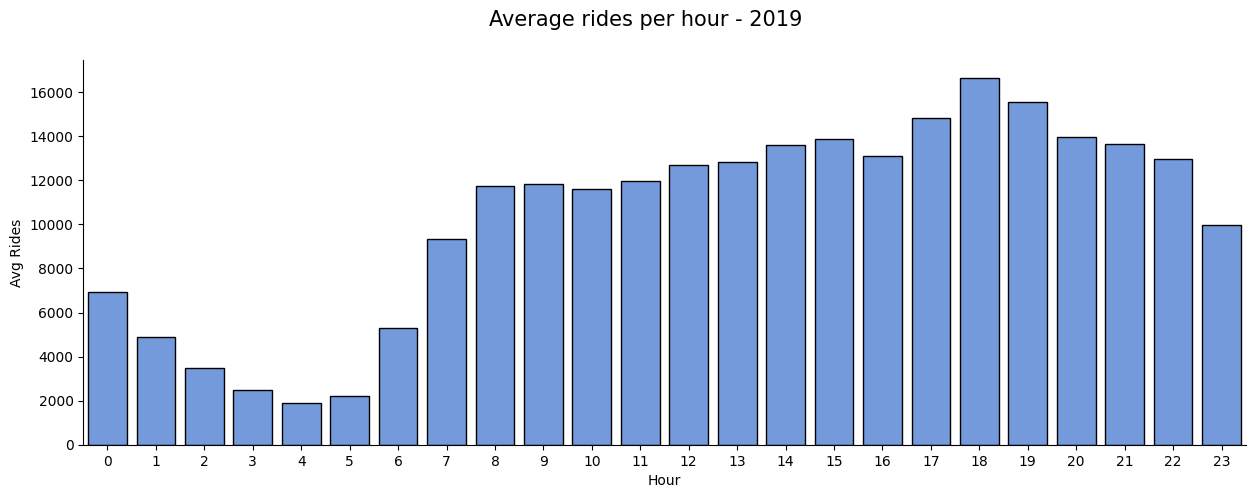

In [190]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=hours_df2019,
    x='hr',
    y='average_rides',
    color='cornflowerblue',
    edgecolor='black'
)
plt.ylabel('Avg Rides')

plt.xlabel('Hour')

fig.suptitle('Average rides per hour - 2019', fontsize=15)
sns.despine()
plt.show()

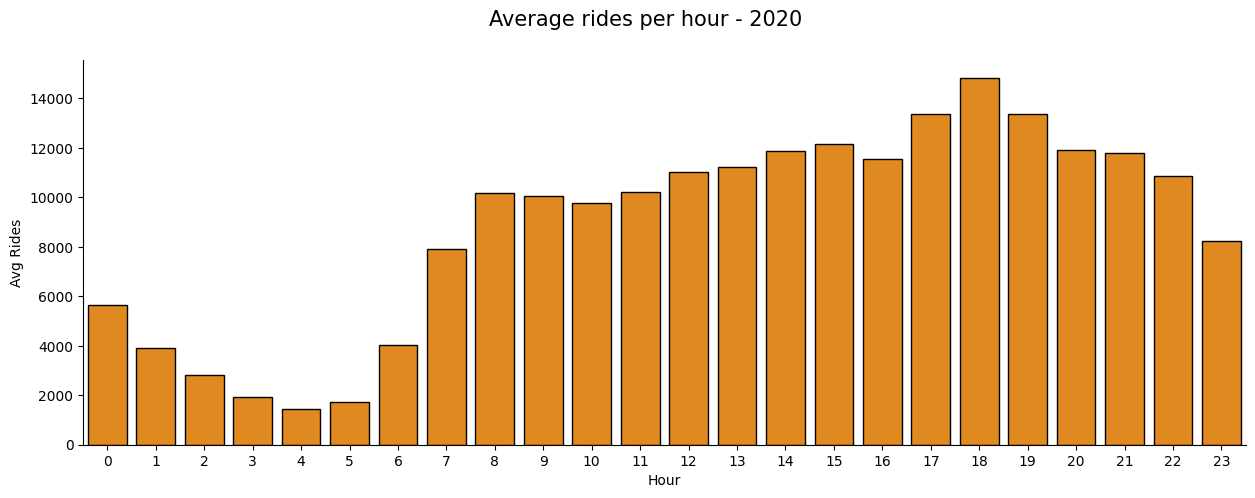

In [191]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=hours_df2020,
    x='hr',
    y='average_rides',
    color='darkorange',
    edgecolor='black'
)

plt.ylabel('Avg Rides')

plt.xlabel('Hour')
fig.suptitle('Average rides per hour - 2020', fontsize=15)
sns.despine()
plt.show()

Now we will combine the two years to analyze if there are changes between the two years

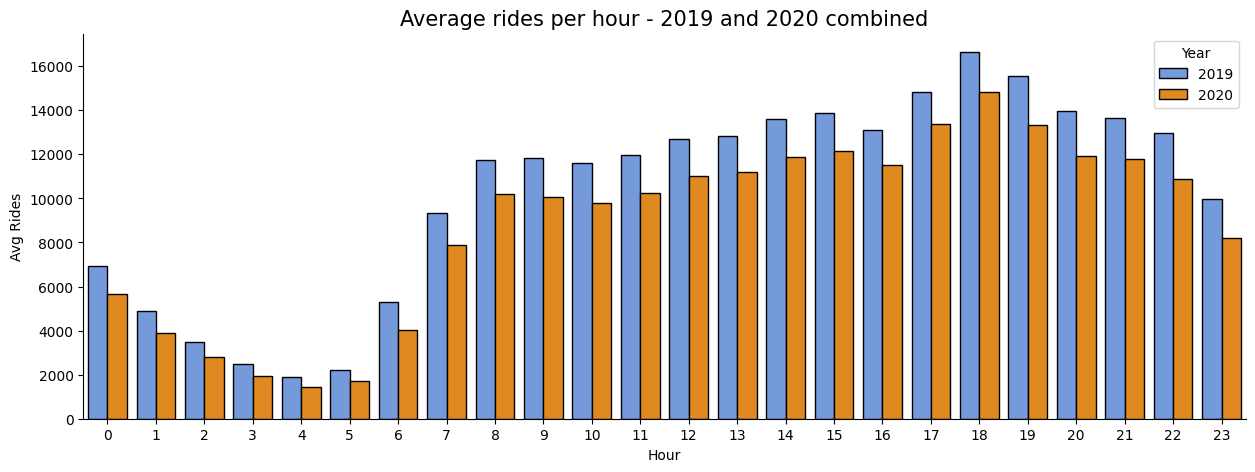

In [192]:

hours_df_combined = pd.concat([hours_df2019.assign(year='2019'), hours_df2020.assign(year='2020')])

fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(data=hours_df_combined, x='hr', y='average_rides', hue='year', palette={'2019': 'cornflowerblue', '2020': 'darkorange'}, edgecolor='black')

plt.title('Average rides per hour - 2019 and 2020 combined', fontsize=15)
plt.legend(title='Year')

plt.ylabel('Avg Rides')

plt.xlabel('Hour')

sns.despine()

plt.show()


The graph depicts the average number of rides per hour for New York City taxis over the course of a day. The x-axis represents hours of the day, and the y-axis represents the average number of rides for each hour. Each column on the graph represents the mean quantity of rides for a specific hour in the months of February 2019 and 2020, providing a comprehensive overview of the flow of taxi journeys. It is evident that in February 2020, the average number of rides per hour is consistently lower than that of 2019 throughout the day. In the early months of 2020, the onset of Covid-19 began reshaping people's habits globally. Although New York did not go into lockdown until the first days of March 2020, it is likely that people's routines were already changing even before that.

As observed in the graph, the slope of the curves is very similar between the two years. Notably, during the night hours, there is a decrease in movements, while during the day hours, the curve tends to rise, reaching its peak at 6 pm with the highest average number of trips.

It is worth noting that in both 2019 and 2020, the time with the least travel is at 4 am, while the time with the most travel is at 6 pm

In [193]:
days_df2019 = df2019.groupby('day', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'total_rides'}, axis=1)


mean_rides_2019 = round(days_df2019.total_rides.mean())
mean_rides_2019

247397

In [194]:
days_df2020 = df2020.groupby('day', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'total_rides'}, axis=1)

mean_rides_2020 = round(days_df2020.total_rides.mean())
mean_rides_2020

211870

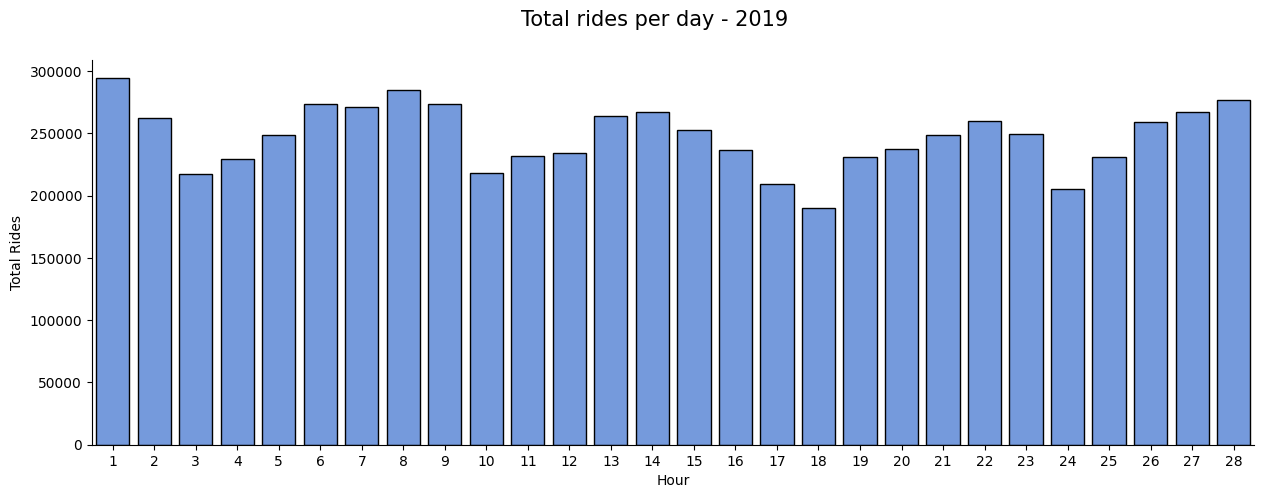

In [195]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=days_df2019,
    x='day',
    y='total_rides',
    color='cornflowerblue',
    edgecolor='black'
)

plt.ylabel('Total Rides')

plt.xlabel('Hour')

fig.suptitle('Total rides per day - 2019', fontsize=15)
sns.despine()
plt.show()

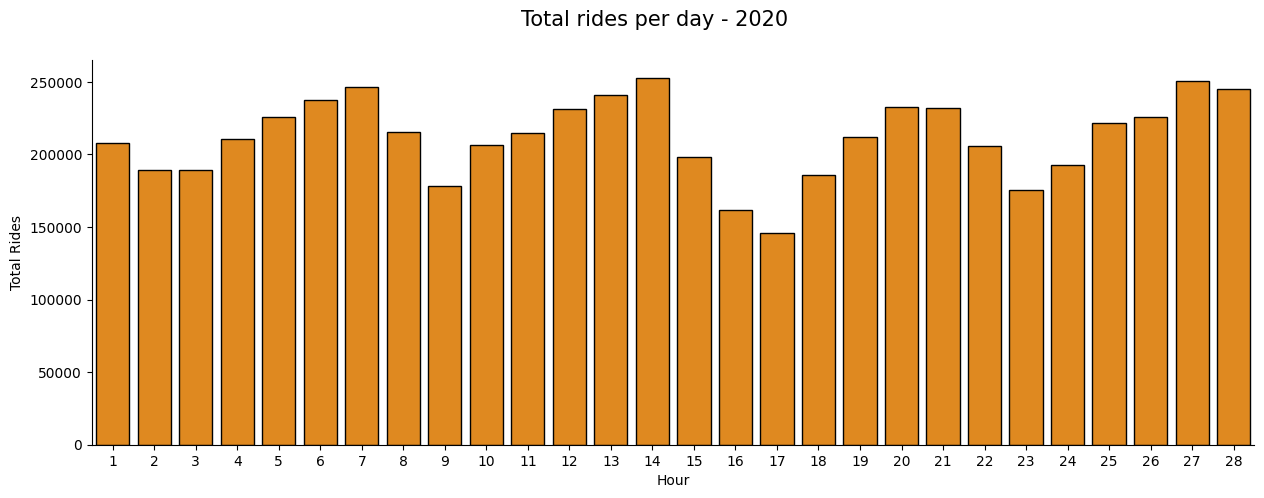

In [196]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=days_df2020,
    x='day',
    y='total_rides',
    color='darkorange',
    edgecolor='black'
)

plt.ylabel('Total Rides')

plt.xlabel('Hour')
fig.suptitle('Total rides per day - 2020', fontsize=15)
sns.despine()
plt.show()

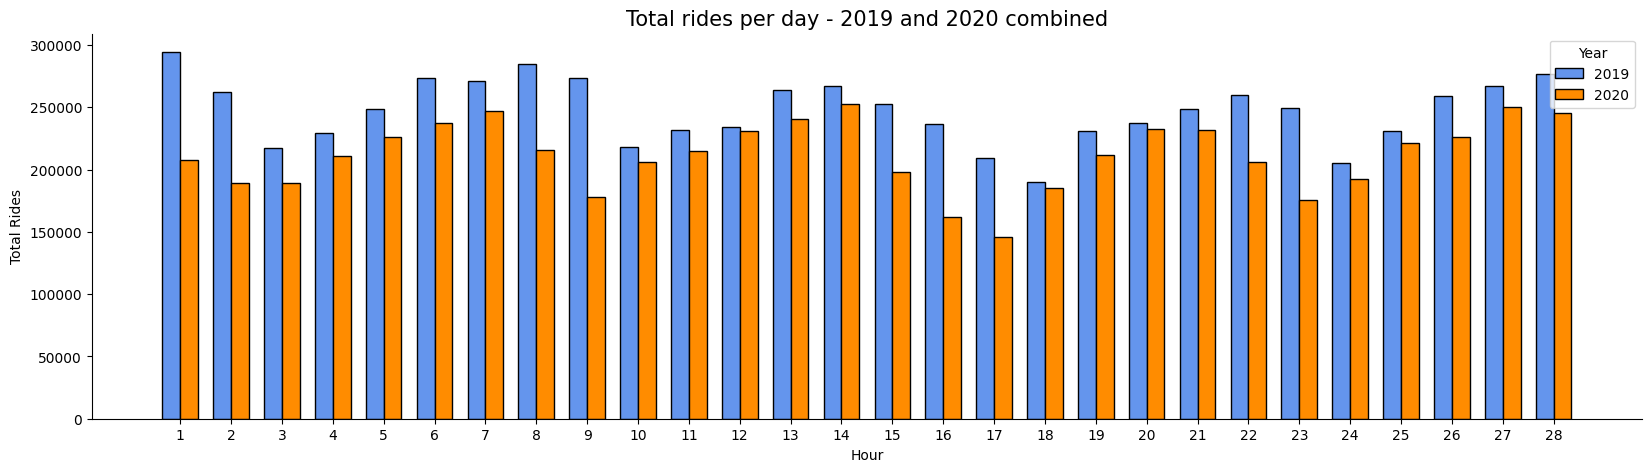

In [197]:
combined_df = pd.merge(days_df2019, days_df2020, on='day', suffixes=('_2019', '_2020'))

fig, ax = plt.subplots(figsize=(20, 5))

bar_width = 0.35
bar_positions_2019 = range(len(combined_df))
bar_positions_2020 = [pos + bar_width for pos in bar_positions_2019]

ax.bar(bar_positions_2019, combined_df['total_rides_2019'], width=bar_width,
       color='cornflowerblue', edgecolor='black', label='2019')

ax.bar(bar_positions_2020, combined_df['total_rides_2020'], width=bar_width,
       color='darkorange', edgecolor='black', label='2020')

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_2019])
ax.set_xticklabels(combined_df['day'])
plt.title('Total rides per day - 2019 and 2020 combined', fontsize=15)
plt.legend(title='Year')


plt.ylabel('Total Rides')

plt.xlabel('Hour')

sns.despine()

plt.show()

In [198]:
print(calendar.month(yy2019, mm) + calendar.month(yy2020, mm))

   February 2019
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28
   February 2020
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29



This analysis explores the fluctuations in the total number of daily taxi rides in New York City over the course of a month. The graph depicts the total number of taxi rides on the y-axis against each day of the month on the x-axis. Each column on the graph corresponds to the total taxi rides for that day, with, for example, around 300k rides on the first day of February 2019 and just over 200k rides on the same day in 2020.

A noteworthy trend highlighted by the graph is the spike in taxi rides on Fridays (Days 2, 9, 16, 23 for 2019 and 7, 14, 21, 28 for 2020). This surge likely indicates increased demand for transportation as people engage in social activities, attend events, or prepare for the weekend. Fridays emerge as a peak point on the graph, reflecting the vibrancy of the city as it gears up for the weekend. Conversely, weekends show a distinct decrease in the total number of taxi rides compared to weekdays. Saturdays and Sundays are marked by valleys in the graph, aligning with the common trend of reduced business and commuting activities during weekends. People may opt for alternative modes of transportation or choose to stay closer to home. Notably, the total number of rides in 2020 has decreased compared to 2019 during the same period (February).

Examining the calendar, a consistent pattern related to the days of the week emerges:
- Friday is the day when taxis are most frequently used.
- Sunday is the day when taxis are least frequently used.

In general, it can be observed that on the initial days of the week (Sunday, Monday, and Tuesday), taxis are used less frequently than on the latter days of the week (Thursday, Saturday, and Sunday)

Now we'll create a heat map for each day's ride count so you can understand what's happening each day hour by hour  

In [199]:

# Convert 'date' column to datetime format
df2019['date'] = pd.to_datetime(df2019['date'])
df2020['date'] = pd.to_datetime(df2020['date'])

# Extract month and day for both years
df2019['date'] = df2019['date'].dt.strftime('%m-%d')
df2020['date'] = df2020['date'].dt.strftime('%m-%d')

hours_df2019 = df2019.pivot_table(
    index='date',
    columns='hr',
    values='VendorID',
    aggfunc='count'
)

hours_df2020 = df2020.pivot_table(
    index='date',
    columns='hr',
    values='VendorID',
    aggfunc='count'
)

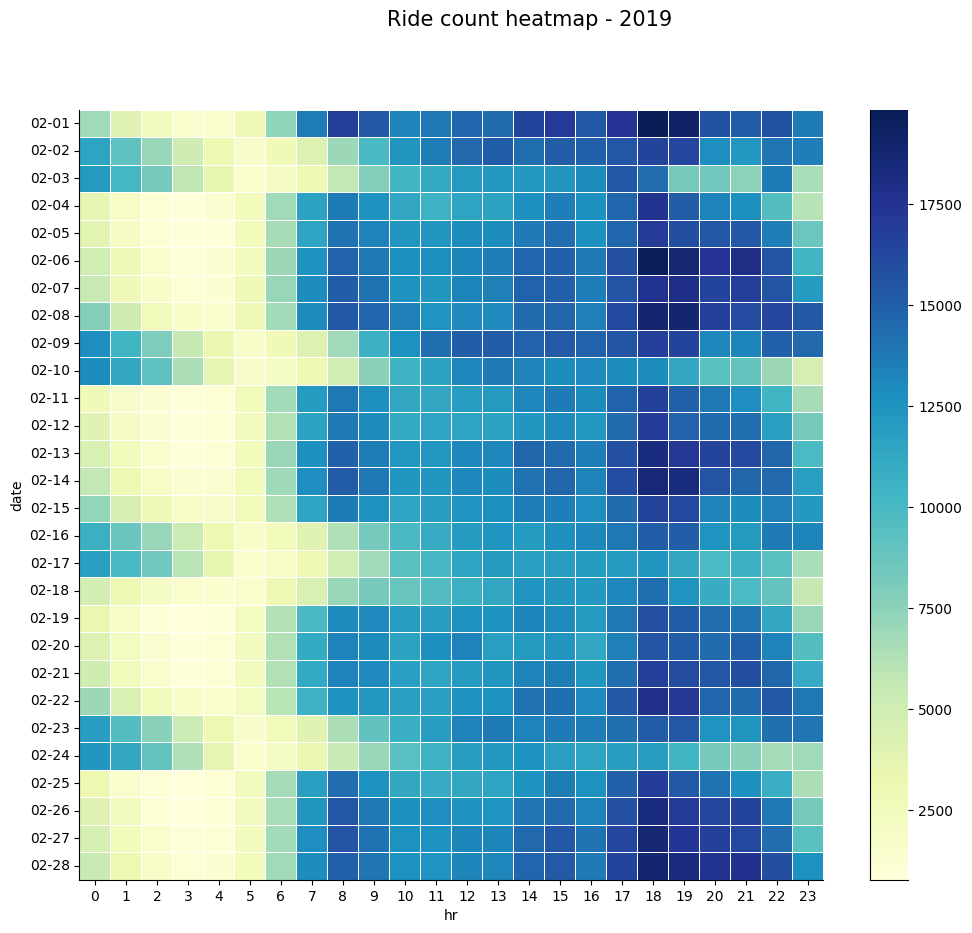

In [200]:
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    data=hours_df2019,
    fmt='.1%',
    linewidths=0.5,
    cmap="YlGnBu"
)
fig.suptitle('Ride count heatmap - 2019', fontsize=15)
sns.despine()
plt.show()

In [201]:
print(calendar.month(yy2019, mm))

   February 2019
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28



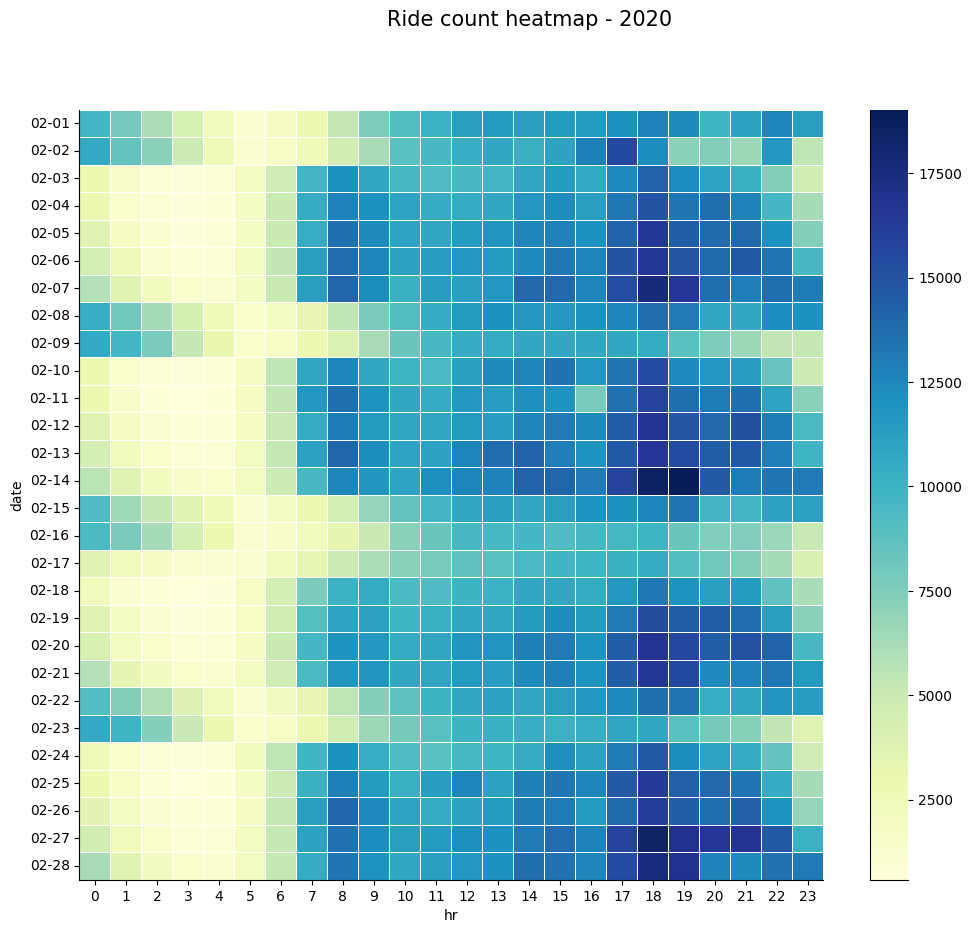

In [202]:
fig = plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    data=hours_df2020,
    fmt='.1%',
    linewidths=0.5,
    cmap="YlGnBu"
)
fig.suptitle('Ride count heatmap - 2020', fontsize=15)
sns.despine()
plt.show()

In [203]:
print(calendar.month(yy2020, mm))

   February 2020
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29



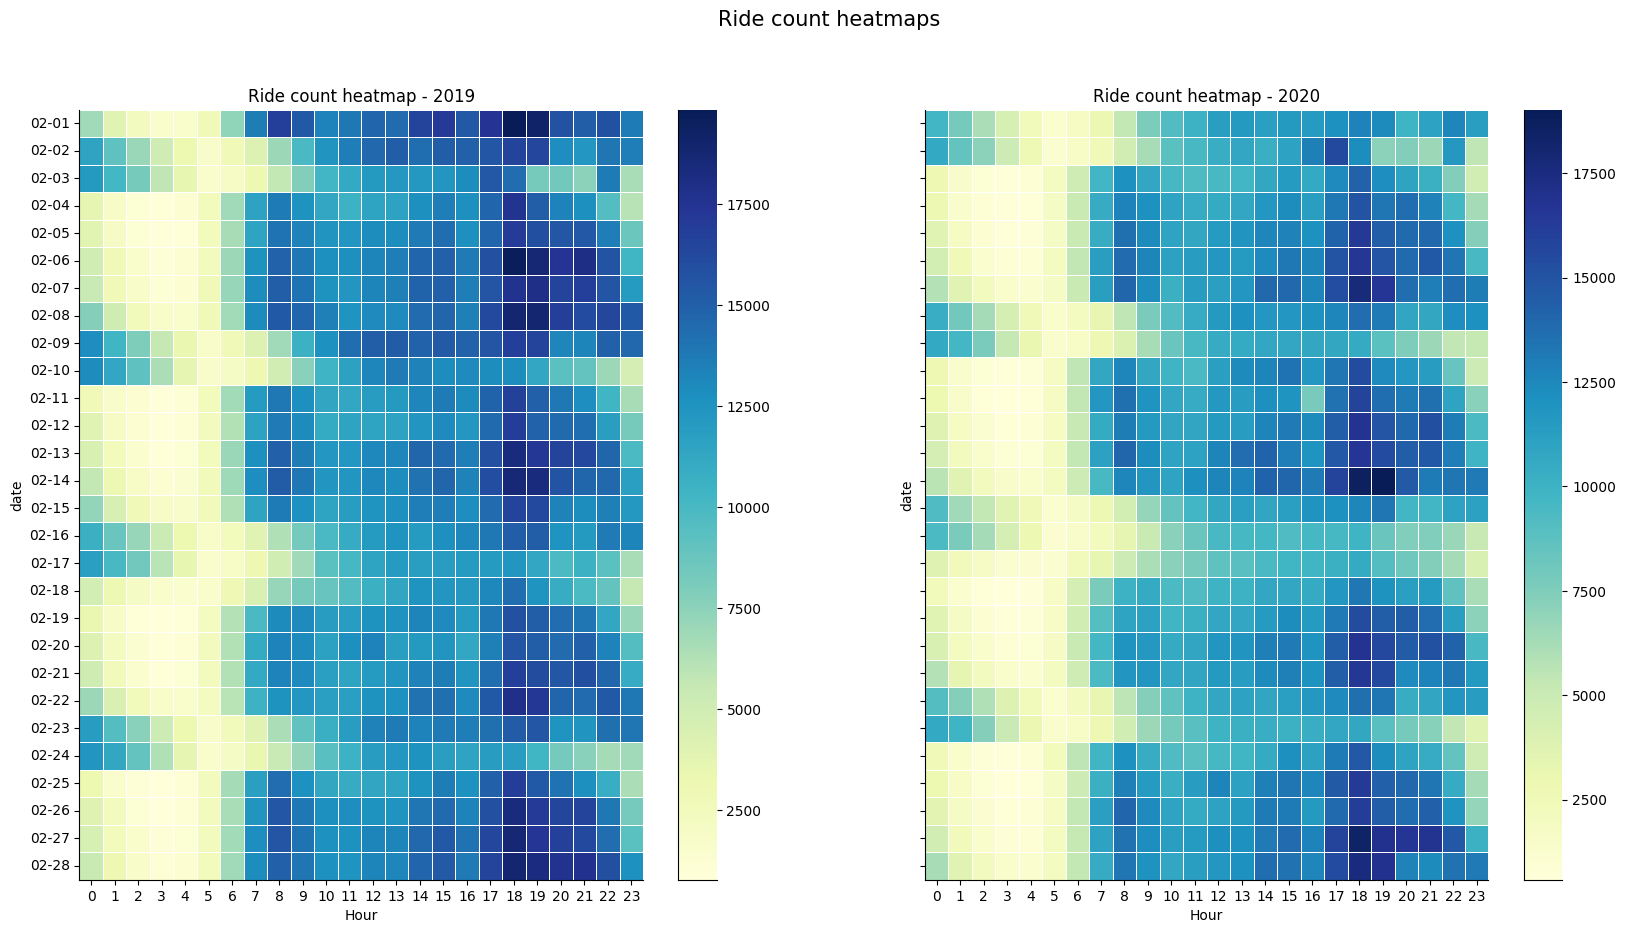

In [248]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

sns.heatmap(data=hours_df2019, fmt='.1%', linewidths=0.5, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Ride count heatmap - 2019')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('date')

sns.heatmap(data=hours_df2020, fmt='.1%', linewidths=0.5, cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Ride count heatmap - 2020')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('date')

fig.suptitle('Ride count heatmaps', fontsize=15)

sns.despine()

plt.show()

In [205]:
print(calendar.month(yy2019, mm) + calendar.month(yy2020, mm))

   February 2019
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28
   February 2020
Mo Tu We Th Fr Sa Su
                1  2
 3  4  5  6  7  8  9
10 11 12 13 14 15 16
17 18 19 20 21 22 23
24 25 26 27 28 29



This graph explores the patterns of taxi rides in New York City throughout February, utilizing a heat map to depict ride frequency variations across different hours of the day. The y-axis of the heat map represents the entire month, while the x-axis delineates the hours, providing a visually striking representation of transportation demand. Darker colors indicate higher ride frequencies, and lighter colors indicate lower frequencies.

Recurring lighter areas, occurring every 5 days, correspond to weekends, where mornings exhibit decreased ride activity, likely due to people sleeping in. Darker periods in the early evening represent rush hour traffic, particularly between 16:00 and 19:00, as people return from work. Another notable darker area occurs during weekend nights, suggesting increased taxi rides, possibly related to people returning from pubs or weekend events. The 2020 graph appears overall lighter, indicating a decrease in the total number of taxi rides.

This graph visually narrates the ebb and flow of transportation demand in the city.

Key patterns observed:
- During night hours, Saturdays and Sundays show increased taxi usage, possibly reflecting heightened social activities during weekend nights.
- Rush hours on weekends are less 'dark' compared to weekdays, with the number of trips not exceeding 15,000, while on Fridays, it reaches 17,500 trips by 6 pm.

#### Rush hours and overnight hours 

We will study rush hours. We will try to understand what hours is rush hours. In extra column there is a information about night hours and rush ones. Rush ones are charged 1 dollar. So this is the way we will try to understand when usually rush hours begin

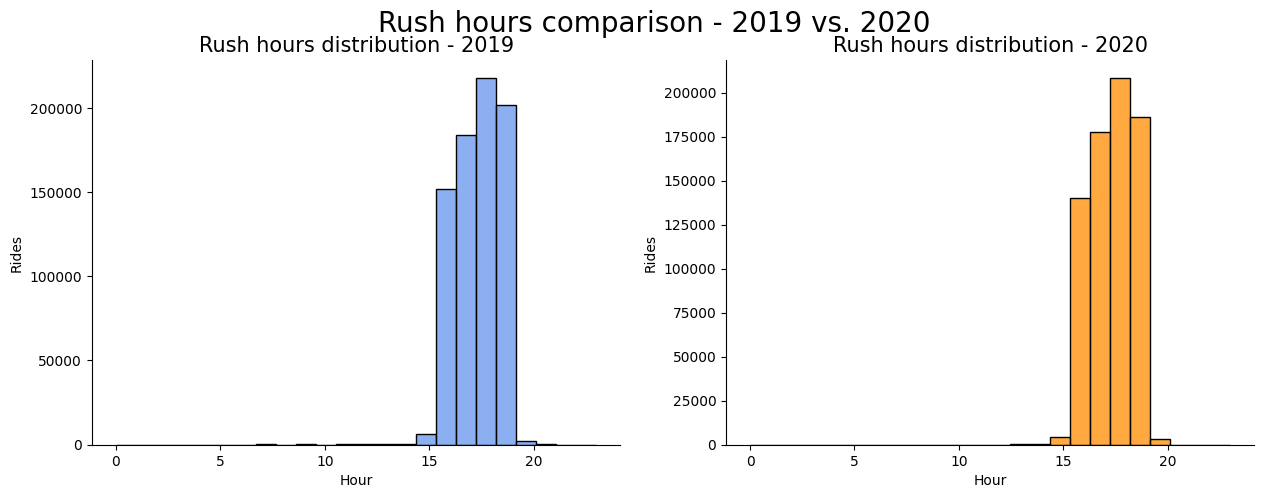

In [208]:
df2019['year'] = 2019
df2020['year'] = 2020

combined_df = pd.concat([df2019[df2019['extra'] == 1], df2020[df2020['extra'] == 1]])

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot for 2019
ax1 = axes[0]
sns.histplot(data=df2019[df2019['extra'] == 1], x='hr', bins=24, color='cornflowerblue', ax=ax1)
ax1.grid(False)
ax1.set_title('Rush hours distribution - 2019', fontsize=15)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Rides')
sns.despine(ax=ax1)

# Plot for 2020
ax2 = axes[1]
sns.histplot(data=df2020[df2020['extra'] == 1], x='hr', bins=24, color='darkorange', ax=ax2)
ax2.grid(False)
ax2.set_title('Rush hours distribution - 2020', fontsize=15)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Rides')
sns.despine(ax=ax2)

plt.suptitle('Rush hours comparison - 2019 vs. 2020', fontsize=20)

plt.show()

In [209]:
df2019[(df2019['hr'] >= 16) & (df2019['hr'] <= 19)].trip_distance.describe()

count   1,684,033.00
mean            2.69
std             3.59
min             0.01
25%             0.92
50%             1.50
75%             2.64
max           104.22
Name: trip_distance, dtype: float64

In [210]:
df2020[(df2020['hr'] >= 16) & (df2020['hr'] <= 19)].trip_distance.describe()

count   1,486,363.00
mean            2.62
std             3.47
min             0.01
25%             0.94
50%             1.53
75%             2.62
max           122.62
Name: trip_distance, dtype: float64

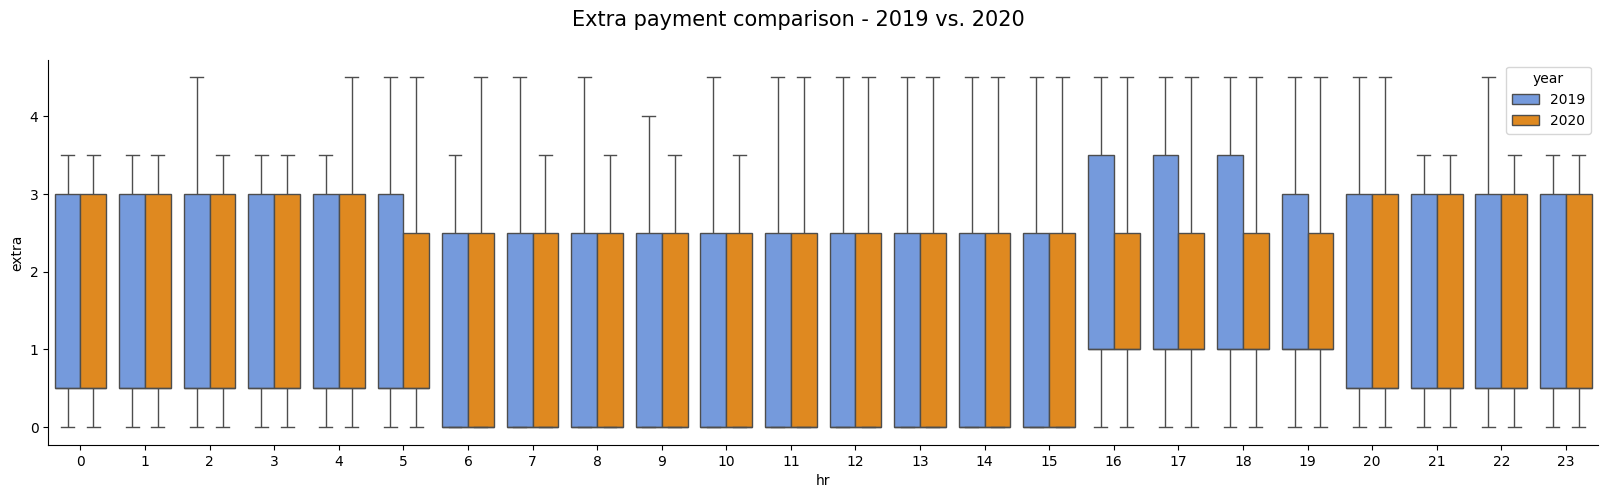

In [211]:
df2019['year'] = 2019
df2020['year'] = 2020

combined_df = pd.concat([df2019[df2019['extra'] < 5], df2020[df2020['extra'] < 5]])

fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=combined_df, x='hr', y='extra', hue='year', color='darkorange', palette={2019: 'cornflowerblue', 2020: 'darkorange'})

fig.suptitle('Extra payment comparison - 2019 vs. 2020', fontsize=15)

sns.despine()

plt.show()

The first graph illustrates the hours during which the rush hour surplus payment has been requested and paid. This means that there is a rush hour period between 16:00 and 19:00, as confirmed by our earlier analysis showing a distinct surge in the number of rides during this timeframe. Taxis incur an extra fare during these so-called rush hours. On the second graph, representing the right side, we observe the average extra payment for each ride, noting an increase during rush hours. Additionally, we can observe that from 20:00 to 5:00, there is an additional fare, likely a night tax imposed on drivers. Other extra payments may be attributed to additional services, such as passing through a paid tunnel or bridge. Together, these two graphs shed light on the phenomenon of rush hour traffic and its impact on taxi rides in New York

#### Passenger count

Let's find average passengers count per ride and median  
  

In [212]:
round(df2019.passenger_count.mean(), 2)

1.57

In [213]:
df2019.passenger_count.median()

1.0

In [214]:
round(df2020.passenger_count.mean(), 2)

1.5

In [215]:
df2020.passenger_count.median()

1.0

In [216]:
dates_2019 = df2019.groupby('day', as_index=False)['passenger_count'] \
    .agg({'passenger_count' : 'sum'}) \
    .rename({'passenger_count' : 'total_passengers'}, axis=1)

round(dates_2019.total_passengers.mean(), 2)

389107.57

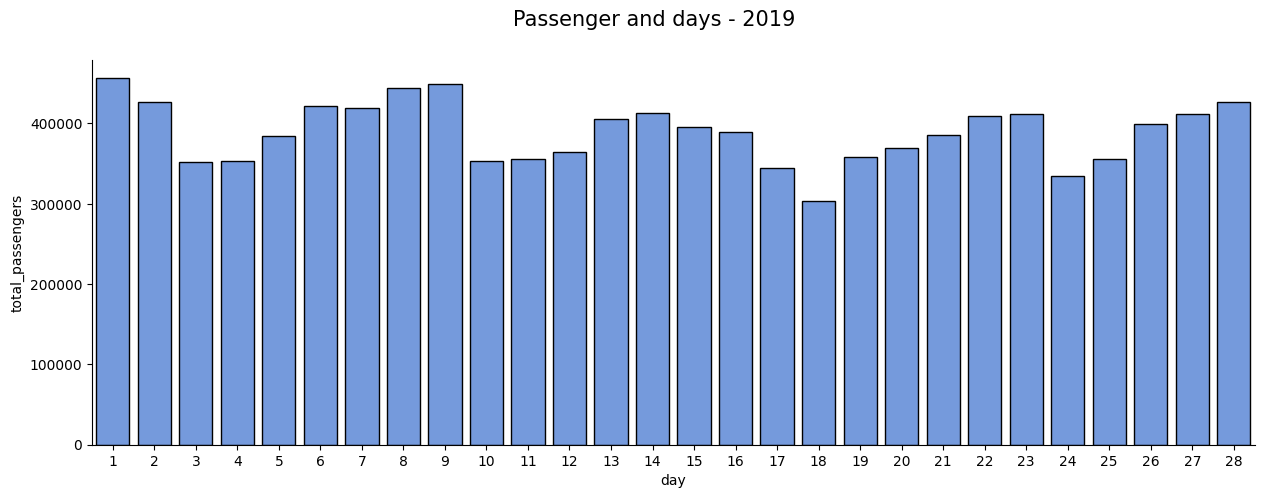

In [217]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=dates_2019,
    x='day',
    y='total_passengers',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Passenger and days - 2019', fontsize=15)
sns.despine()
plt.show()

In [218]:
dates_2020 = df2020.groupby('day', as_index=False)['passenger_count'] \
    .agg({'passenger_count' : 'sum'}) \
    .rename({'passenger_count' : 'total_passengers'}, axis=1)

round(dates_2020.total_passengers.mean(), 2)

318613.0

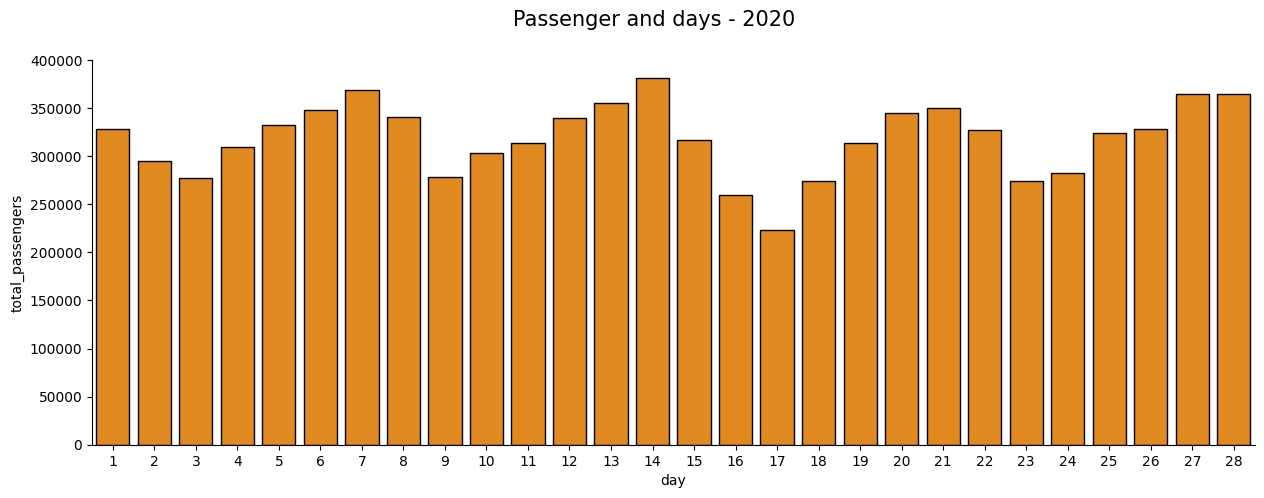

In [219]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=dates_2020,
    x='day',
    y='total_passengers',
    color='darkorange',
    edgecolor='black'
)
fig.suptitle('Passenger and days - 2020', fontsize=15)
sns.despine()
plt.show()

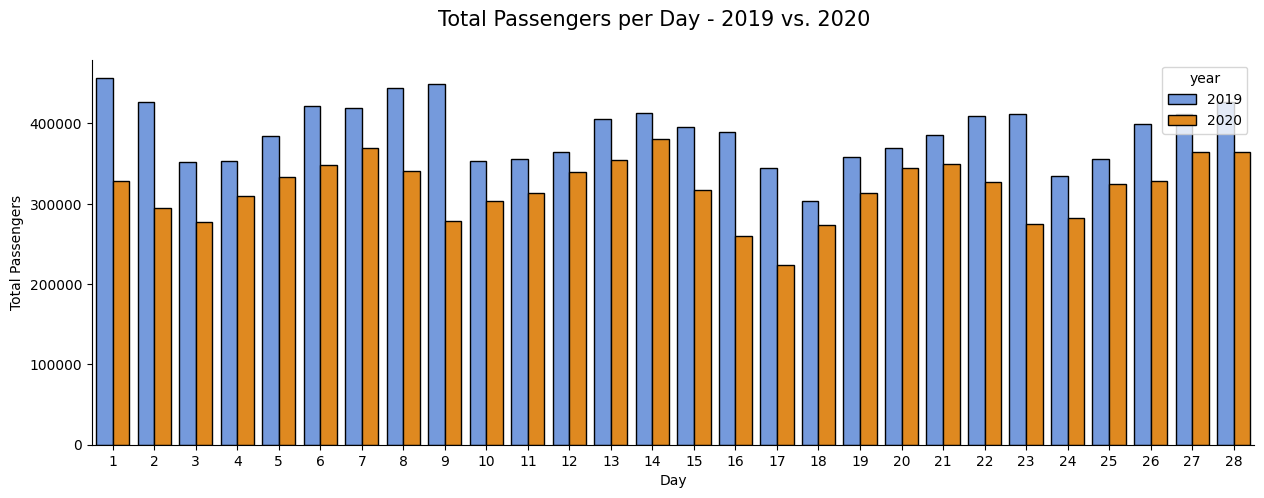

In [220]:
# Concatenate the dataframes
combined_dates = pd.concat([
    df2019.groupby('day', as_index=False)['passenger_count'].agg({'total_passengers': 'sum', 'year': lambda x: 2019}),
    df2020.groupby('day', as_index=False)['passenger_count'].agg({'total_passengers': 'sum', 'year': lambda x: 2020})
])

# Create the combined bar plot
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=combined_dates, x='day', y='total_passengers', hue='year', palette={2019: 'cornflowerblue', 2020: 'darkorange'}, edgecolor='black')

# Set title and labels
fig.suptitle('Total Passengers per Day - 2019 vs. 2020', fontsize=15)
ax.set_xlabel('Day')
ax.set_ylabel('Total Passengers')

# Remove spines for better aesthetics
sns.despine()

# Show the plot
plt.show()

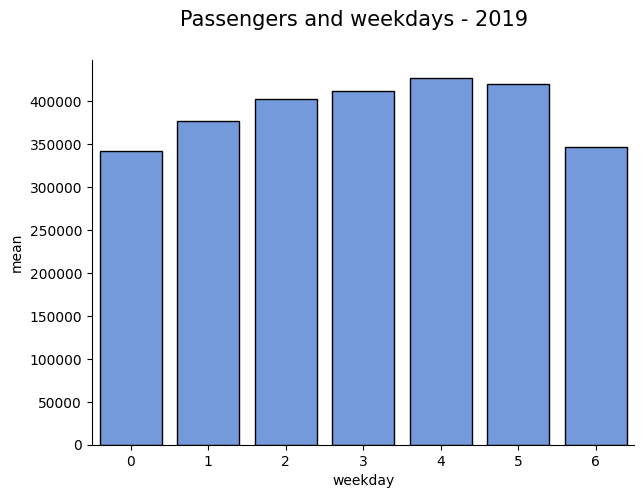

In [221]:
weekdays_df2019 = df2019.groupby(['weekday', 'date'], as_index=False)['passenger_count'] \
    .agg({'passenger_count' : 'sum'}) \
    .rename({'passenger_count' : 'total'}, axis=1).groupby('weekday', as_index=False)['total'] \
    .agg({'total' : 'mean'}) \
    .rename({'total' : 'mean'}, axis=1)


fig = plt.figure(figsize=(7, 5))
ax = sns.barplot(
    data=weekdays_df2019,
    x='weekday',
    y='mean',
    color='cornflowerblue',
    edgecolor='black'
)
fig.suptitle('Passengers and weekdays - 2019', fontsize=15)
sns.despine()
plt.show()

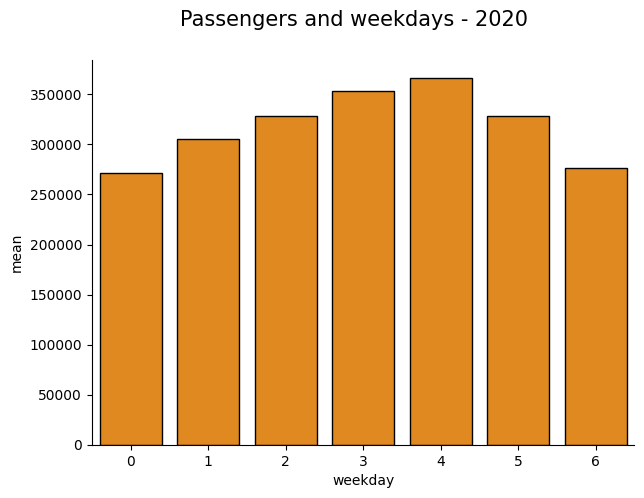

In [222]:
weekdays_df2020 = df2020.groupby(['weekday', 'date'], as_index=False)['passenger_count'] \
    .agg({'passenger_count' : 'sum'}) \
    .rename({'passenger_count' : 'total'}, axis=1).groupby('weekday', as_index=False)['total'] \
    .agg({'total' : 'mean'}) \
    .rename({'total' : 'mean'}, axis=1)

fig = plt.figure(figsize=(7, 5))
ax = sns.barplot(
    data=weekdays_df2020,
    x='weekday',
    y='mean',
    color='darkorange',
    edgecolor='black'
)
fig.suptitle('Passengers and weekdays - 2020', fontsize=15)
sns.despine()

plt.show()

This analysis examines the fluctuations in the total number of daily taxi passengers in New York over the course of a month. The graph portrays the total number of passengers in taxis on the y-axis against each day of the month on the x-axis, with each column representing the total taxi passengers for that day.

A noticeable trend highlighted by the graph is the upswing in taxi passengers on Fridays (day numbers 2, 9, 16, 23 for 2019 and 7, 14, 21, 28 for 2020). This surge likely signifies an increased demand for transportation as people partake in social activities, attend events, or venture out for the weekend. Friday emerges as the peak point in the graph, reflecting the vibrancy of the city as it anticipates the weekend. In contrast, weekends exhibit a distinct decrease in the total number of taxi passengers compared to weekdays, with Saturday and Sunday marked by valleys in the graph. This pattern aligns with the common trend of reduced work and commuting activities during weekends, as individuals may opt for alternative transportation modes or stay closer to home. Additionally, the graph highlights a decrease in the total number of passengers between 2019 and 2020 during the same period (February), indicating fewer trips in 2020 compared to 2019.

#### Trip distance 

In [223]:
df2019.trip_distance.describe()

count   6,927,124.00
mean            2.89
std             3.74
min             0.01
25%             0.96
50%             1.60
75%             2.92
max           701.50
Name: trip_distance, dtype: float64

In [224]:
np.percentile(df2019.trip_distance, 95)

10.7

In [225]:
df2020.trip_distance.describe()

count   5,932,354.00
mean            2.81
std             3.61
min             0.01
25%             0.98
50%             1.60
75%             2.89
max           166.07
Name: trip_distance, dtype: float64

In [226]:
np.percentile(df2020.trip_distance, 95)

10.0

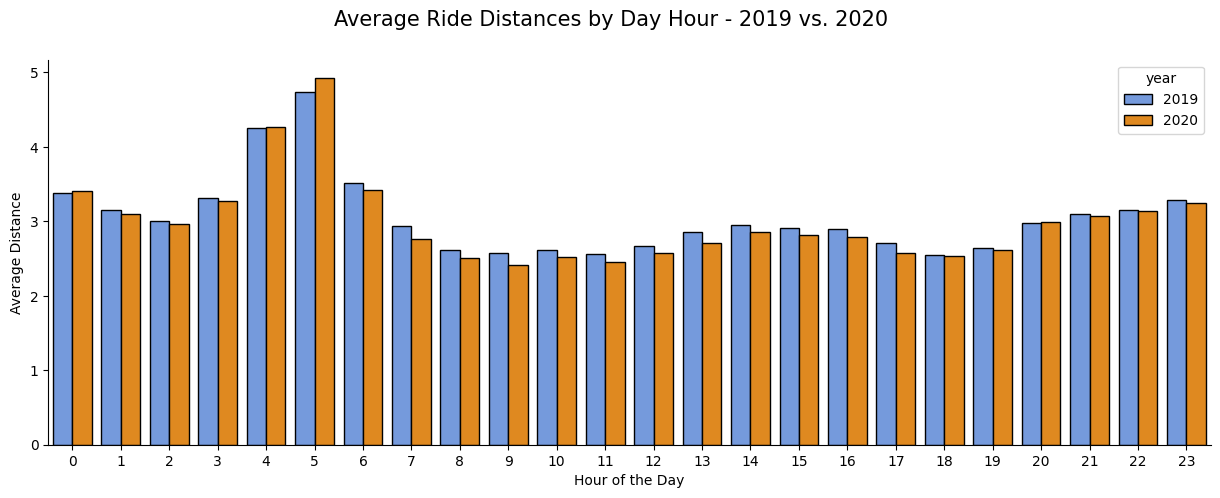

In [227]:

distances_df2019 = df2019.groupby('hr', as_index=False)['trip_distance'] \
    .agg({'trip_distance': 'mean'}) \
    .rename({'trip_distance': 'av_dist'}, axis=1)
distances_df2019['year'] = 2019

distances_df2020 = df2020.groupby('hr', as_index=False)['trip_distance'] \
    .agg({'trip_distance': 'mean'}) \
    .rename({'trip_distance': 'av_dist'}, axis=1)
distances_df2020['year'] = 2020

combined_distances_df = pd.concat([distances_df2019, distances_df2020])

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=combined_distances_df, x='hr', y='av_dist', hue='year', palette={2019: 'cornflowerblue', 2020: 'darkorange'}, edgecolor='black')

fig.suptitle('Average Ride Distances by Day Hour - 2019 vs. 2020', fontsize=15)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Distance')

sns.despine()

plt.show()

The most long rides are at 5 am and more generally the night rides are longer than day ones  

In [228]:
trip_distance_2019 = df2019.pivot_table(
    index='date',
    columns='hr',
    values='trip_distance',
    aggfunc='mean'
)
trip_distance_2020 = df2020.pivot_table(
    index='date',
    columns='hr',
    values='trip_distance',
    aggfunc='mean'
)

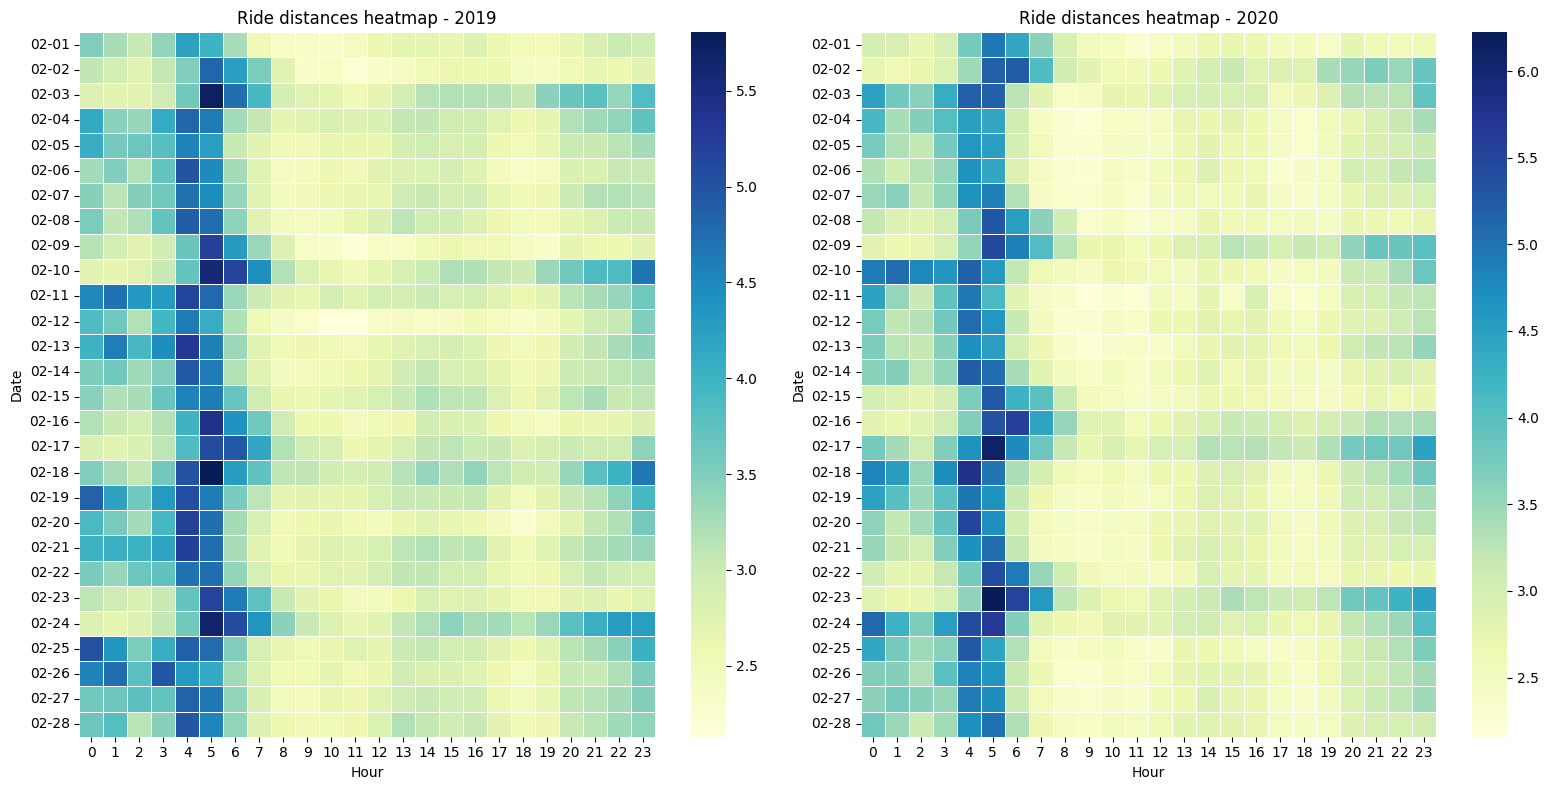

In [229]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(
    data=trip_distance_2019,
    fmt='.1%',
    linewidths=0.5,
    cmap='YlGnBu',
    ax=axes[0]
)
axes[0].set_title('Ride distances heatmap - 2019')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Date')

sns.heatmap(
    data=trip_distance_2020,
    fmt='.1%',
    linewidths=0.5,
    cmap='YlGnBu',
    ax=axes[1]
)
axes[1].set_title('Ride distances heatmap - 2020')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Date')

plt.tight_layout()
plt.show()

According to the heatmap of distances, the longest trips are made at nights from 4 am to 5 am. On Mondays they're long throughout the night. During the daytime, trips are mostly very short - less than 3 miles  
  

#### Duration

We're going to find average ride duration  
  

In [230]:
df2019.duration.describe()

count   6,927,124.00
mean           13.72
std            10.60
min             0.02
25%             6.53
50%            10.83
75%            17.58
max           199.90
Name: duration, dtype: float64

In [231]:
round(np.percentile(df2019.duration, 95), 2)

34.32

In [232]:
df2020.duration.describe()

count   5,932,354.00
mean           13.41
std            10.05
min             0.02
25%             6.62
50%            10.82
75%            17.17
max           199.98
Name: duration, dtype: float64

In [233]:
round(np.percentile(df2020.duration, 95), 2)

32.43

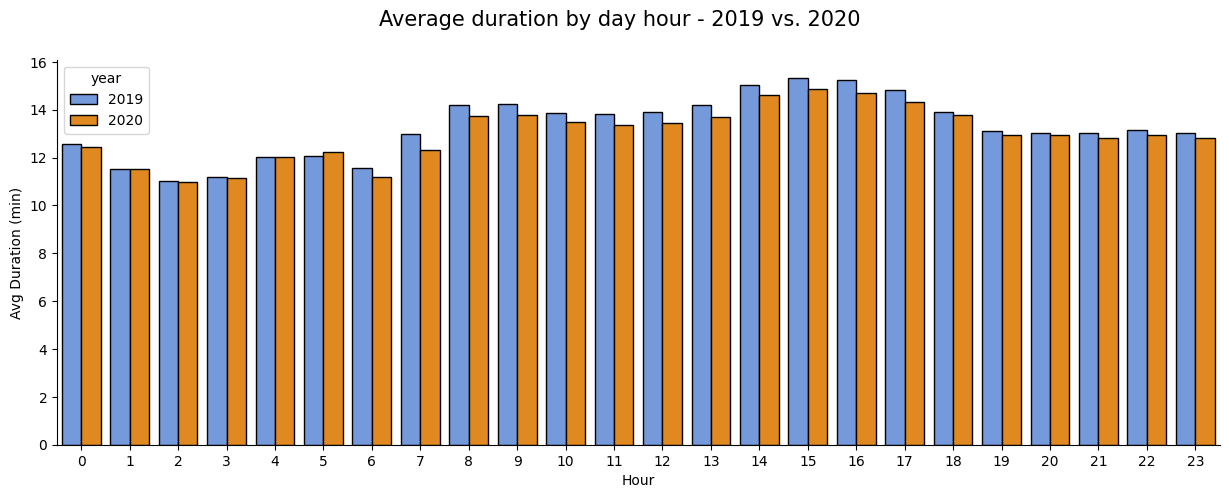

In [234]:
avg_duration_df2019 = df2019.groupby('hr', as_index=False)['duration'] \
    .agg({'duration' : 'mean'}) \
    .rename({'duration' : 'avg_duration'}, axis=1)

avg_duration_df2020 = df2020.groupby('hr', as_index=False)['duration'] \
    .agg({'duration' : 'mean'}) \
    .rename({'duration' : 'avg_duration'}, axis=1)

avg_duration_df2019['year'] = 2019
avg_duration_df2020['year'] = 2020

combined_df = pd.concat([avg_duration_df2019, avg_duration_df2020])

fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(
    data=combined_df,
    x='hr',
    y='avg_duration',
    hue='year',
    palette={2019: 'cornflowerblue', 2020: 'darkorange'},
    edgecolor='black'
)

plt.ylabel('Avg Duration (min)')

plt.xlabel('Hour')


fig.suptitle('Average duration by day hour - 2019 vs. 2020', fontsize=15)
sns.despine()
plt.show()

This graph analyzes the average length of trips by hour of day between the two years. As we can easily see there are not many differences between 2019 and 2020 except for some hours of the day where the average duration is one minute longer

#### Districts

Let's see top 10 pick up and drop off districts  
  

In [235]:
top10_pickup_districts_2019 = df2019.groupby('PULocationID', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(10)

top10_dropoff_districts_2019 = df2019.groupby('DOLocationID', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(10)

In [236]:
top10_pickup_districts_2020 = df2020.groupby('PULocationID', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(10)

top10_dropoff_districts_2020 = df2020.groupby('DOLocationID', as_index=False)['VendorID'] \
    .agg({'VendorID' : 'count'}) \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(10)

And we will load dataset which one could help me know the districts names  
  

In [237]:
taxi_zone_lookup = pd.read_csv('./data/taxi+_zone_lookup.csv') \
    .drop('service_zone', axis=1)

In [238]:
taxi_zone_lookup.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


In [239]:
top10_pickup_districts_2019 = top10_pickup_districts_2019.merge(
    taxi_zone_lookup,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
top10_dropoff_districts_2019 = top10_dropoff_districts_2019.merge(
    taxi_zone_lookup,
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)

In [240]:
top10_pickup_districts_2020 = top10_pickup_districts_2020.merge(
    taxi_zone_lookup,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
top10_dropoff_districts_2020 = top10_dropoff_districts_2020.merge(
    taxi_zone_lookup,
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)

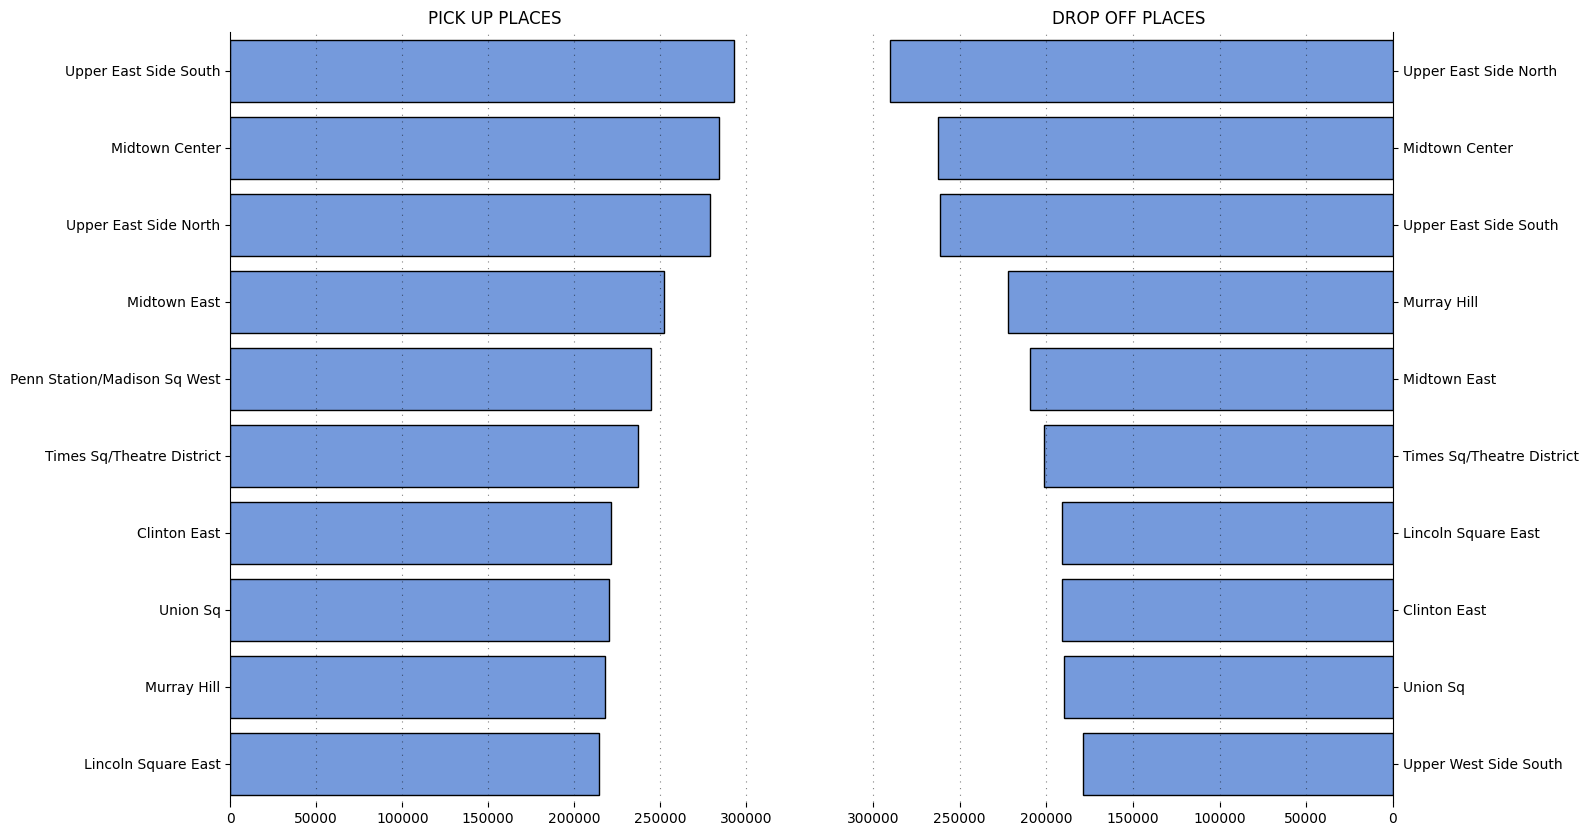

In [241]:
fig = plt.figure(figsize=(15, 10))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.barplot(
    data=top10_pickup_districts_2019,
    x='count',
    y='Zone',
    color='cornflowerblue',
    edgecolor='black',
    ax=ax0
)

sns.barplot(
    data=top10_dropoff_districts_2019,
    x='count',
    y='Zone',
    color='cornflowerblue',
    edgecolor='black',
    ax=ax1
)
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')

ax0.grid(color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax1.grid(color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)

ax0.set_title('PICK UP PLACES')
ax1.set_title('DROP OFF PLACES')

ax0.set_ylabel('')
ax1.set_ylabel('')
ax0.set_xlabel('')
ax1.set_xlabel('')

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
for s in ['top', 'bottom','left']:    
    ax1.spines[s].set_visible(False)
plt.show()

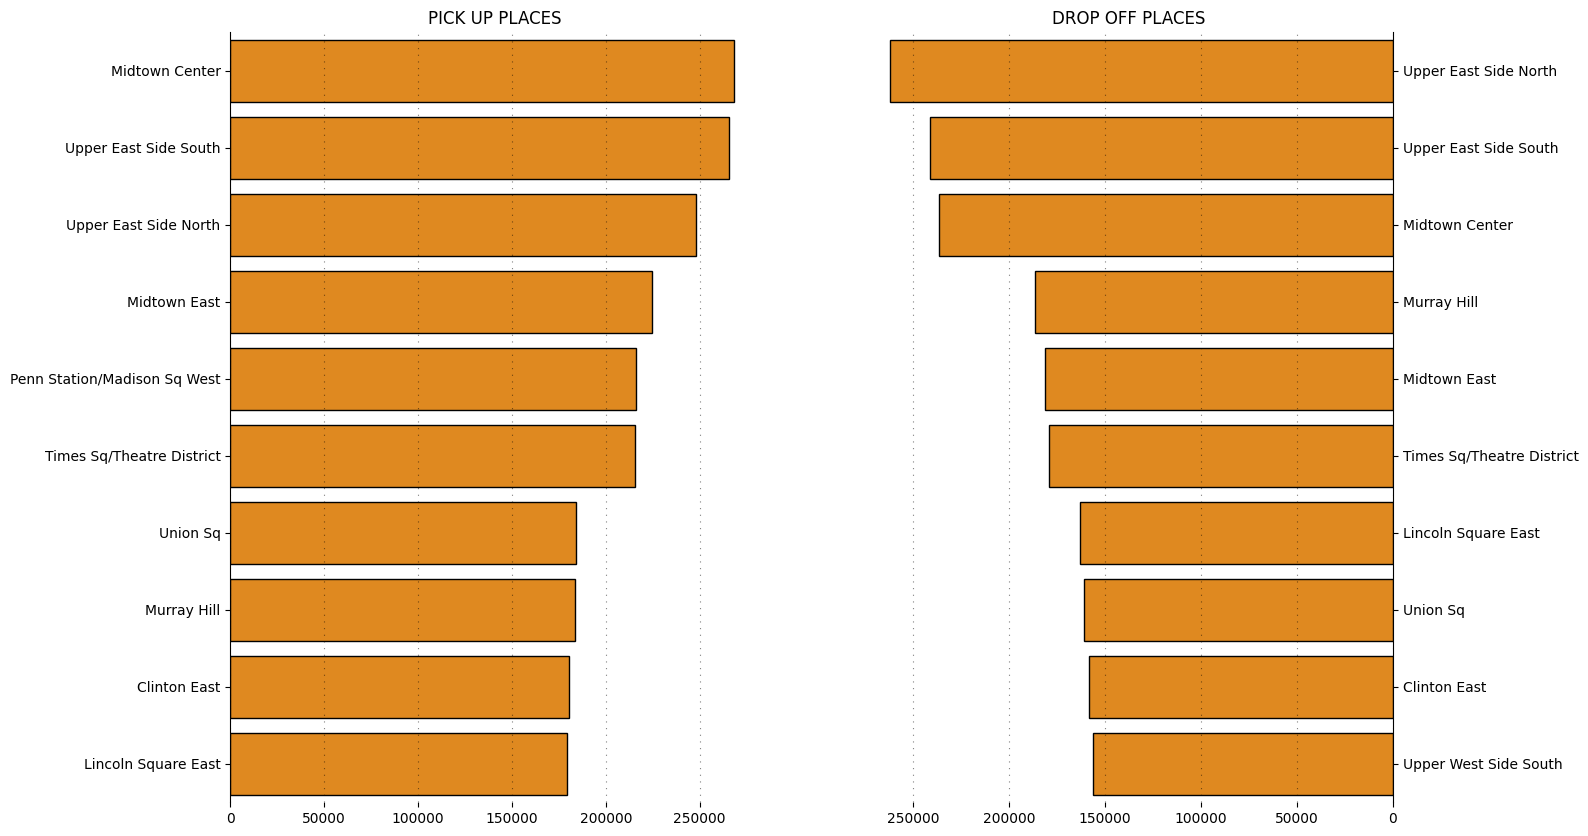

In [242]:
fig = plt.figure(figsize=(15, 10))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.barplot(
    data=top10_pickup_districts_2020,
    x='count',
    y='Zone',
    color='darkorange',
    edgecolor='black',
    ax=ax0
)

sns.barplot(
    data=top10_dropoff_districts_2020,
    x='count',
    y='Zone',
    color='darkorange',
    edgecolor='black',
    ax=ax1
)
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')

ax0.grid(color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)
ax1.grid(color='black', linestyle=':', axis='x', dashes=(1,5), alpha=0.5)

ax0.set_title('PICK UP PLACES')
ax1.set_title('DROP OFF PLACES')

ax0.set_ylabel('')
ax1.set_ylabel('')
ax0.set_xlabel('')
ax1.set_xlabel('')

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)
    
for s in ['top', 'bottom','left']:    
    ax1.spines[s].set_visible(False)
plt.show()

In [243]:
popular_directions = df2019.groupby(['PULocationID', 'DOLocationID'], as_index=False)['VendorID'].count() \
    .dropna() \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(20)

popular_directions = popular_directions.merge(
    taxi_zone_lookup,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename({'Zone' : 'pick_up_nh'}, axis=1).drop(['LocationID', 'Borough'], axis=1).merge(
    taxi_zone_lookup,
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).rename({'Zone' : 'drop_off_nh'}, axis=1).drop(['LocationID', 'Borough'], axis=1)

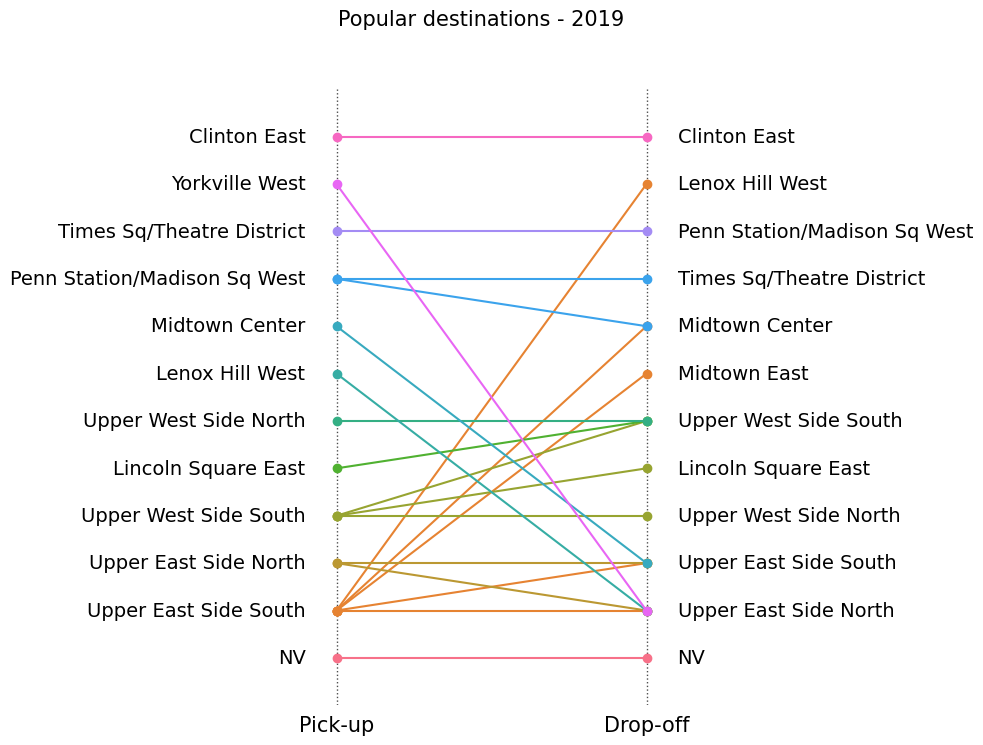

In [244]:
import matplotlib.lines as mlines


left_label = list(popular_directions.pick_up_nh.unique())
right_label = list(popular_directions.drop_off_nh.unique())

# Generate colors dynamically based on the number of unique elements in left_label
colors_list = sns.color_palette("husl", n_colors=len(left_label))

fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor='white')
fig.suptitle('Popular destinations - 2019', fontsize=15)

ax.vlines(x=1, ymin=-1, ymax=len(left_label), color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=-1, ymax=len(left_label), color='black', alpha=0.7, linewidth=1, linestyles='dotted')

for num, district in enumerate(left_label):
    ax.text(0.8, num, s=left_label[num], horizontalalignment='right', verticalalignment='center', fontdict={'size': 14})

for num, district in enumerate(right_label):
    ax.text(3.2, num, s=right_label[num], horizontalalignment='left', verticalalignment='center', fontdict={'size': 14})

for num, district in enumerate(left_label):
    N = [i for i, x in enumerate(popular_directions.pick_up_nh) if x == left_label[num]]
    for i in N:
        d = popular_directions.drop_off_nh[i]
        j = right_label.index(d)
        l = mlines.Line2D([1, 3], [num, j], marker='o', markersize=6, color=colors_list[num])
        ax.add_line(l)

ax.set(xlim=(0, 4), ylim=(-1, len(left_label)), ylabel='')
ax.set_xticks([1, 3])
ax.set_xticklabels(['Pick-up', 'Drop-off'], fontsize=15)
ax.tick_params(axis='both', which='both', left=False, bottom=False, labelleft=False)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

In [245]:
popular_directions = df2020.groupby(['PULocationID', 'DOLocationID'], as_index=False)['VendorID'].count() \
    .dropna() \
    .rename({'VendorID' : 'count'}, axis=1) \
    .sort_values('count', ascending=False) \
    .head(20)

popular_directions = popular_directions.merge(
    taxi_zone_lookup,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).rename({'Zone' : 'pick_up_nh'}, axis=1).drop(['LocationID', 'Borough'], axis=1).merge(
    taxi_zone_lookup,
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).rename({'Zone' : 'drop_off_nh'}, axis=1).drop(['LocationID', 'Borough'], axis=1)

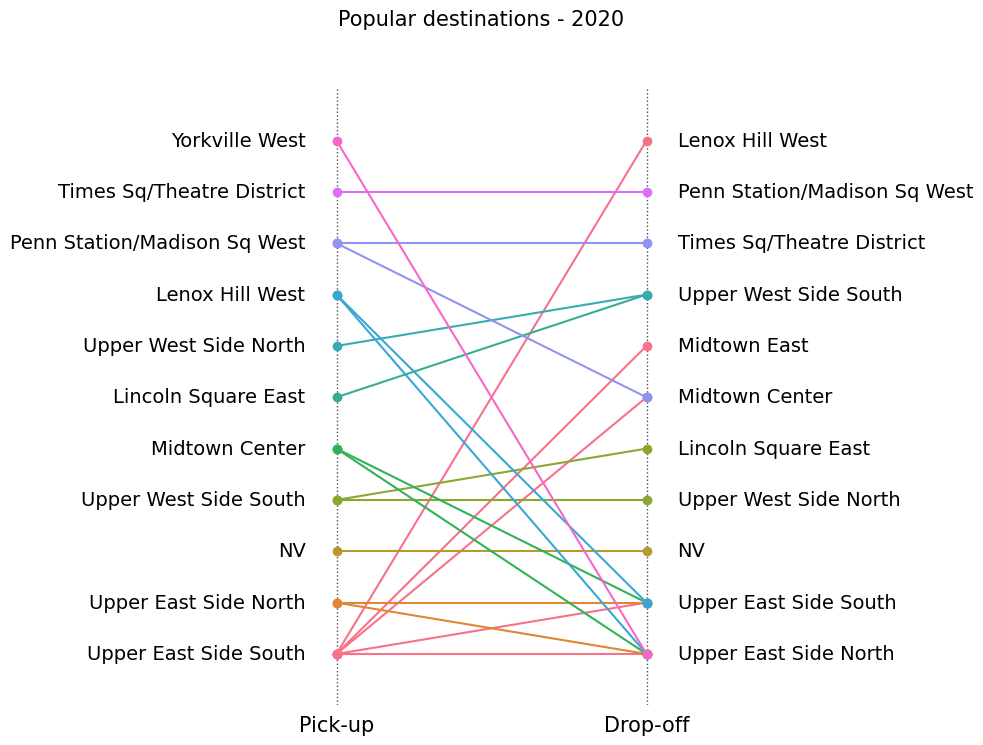

In [246]:
left_label = list(popular_directions.pick_up_nh.unique())
right_label = list(popular_directions.drop_off_nh.unique())

# Generate colors dynamically based on the number of unique elements in left_label
colors_list = sns.color_palette("husl", n_colors=len(left_label))

fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor='white')
fig.suptitle('Popular destinations - 2020', fontsize=15)

ax.vlines(x=1, ymin=-1, ymax=len(left_label), color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=-1, ymax=len(left_label), color='black', alpha=0.7, linewidth=1, linestyles='dotted')

for num, district in enumerate(left_label):
    ax.text(0.8, num, s=left_label[num], horizontalalignment='right', verticalalignment='center', fontdict={'size': 14})

for num, district in enumerate(right_label):
    ax.text(3.2, num, s=right_label[num], horizontalalignment='left', verticalalignment='center', fontdict={'size': 14})

for num, district in enumerate(left_label):
    N = [i for i, x in enumerate(popular_directions.pick_up_nh) if x == left_label[num]]
    for i in N:
        d = popular_directions.drop_off_nh[i]
        j = right_label.index(d)
        l = mlines.Line2D([1, 3], [num, j], marker='o', markersize=6, color=colors_list[num])
        ax.add_line(l)

ax.set(xlim=(0, 4), ylim=(-1, len(left_label)), ylabel='')
ax.set_xticks([1, 3])
ax.set_xticklabels(['Pick-up', 'Drop-off'], fontsize=15)
ax.tick_params(axis='both', which='both', left=False, bottom=False, labelleft=False)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

One constant that remains unchanged between 2019 and 2020 is the prevalence of the most common destinations and pickups in the city of New York. The graph clearly illustrates that these popular routes have persisted across the years, suggesting that, despite a potential decrease in overall taxi usage, the population of New York continues to follow the same routes on average. Notably, many of these destinations exhibit a two-way connection, indicating that the most frequented destination for a particular pickup often serves as the origin for the reverse trip. For instance, individuals commuting from midtown center to the upper east side frequently make the return journey from the upper east side to midtown center. This pattern could be attributed to regular commuting for work or other daily activities.